# EDA Questions / Tasks:
1. General EDA
2. Is there a correlation between a Pokemon's Legendary status and its stats?
3. Is there a correlation between a Pokemon's Legendary status and its catch rate?
4. What does the type distribution look like amongst the Legendary Pokemon?
5. Is there a correlation between a Pokemon's primary and secondary types and its stats?
6. Is there a correlation between a Pokemon's egg groups and primary and secondary types?
7. Is there a correlation between the types of moves Pokemon learn when they level up and their primary and secondary types??
8. Is there power creep from earlier generations to later generations?
9. Are there frequent pairings between primary and secondary types throughout the dataset?

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Prevent warnings from appearing
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Change the amount of rows shown in printed dataframes
pd.set_option('display.max_rows', None, 'display.max_columns', None)

# Set seaborn theme
sns.set_theme()

In [4]:
# Read in pokedex csv
pokedex = pd.read_csv('../data/pokedex_merged.csv')
pokedex = pokedex.where(pd.notnull(pokedex), None)

In [5]:
# Function to display values above plots
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [6]:
# Dictionary to define color scheme for each type when plotting
type_colors = {'Grass': '#82C95B', 
               'Fire': '#E87A3D', 
               'Water': '#639CE4', 
               'Normal': '#ACAD99', 
               'Bug': '#ACC23E', 
               'Poison': '#B369AF', 
               'Electric': '#E7C536', 
               'Ground': '#CEB250', 
               'Fairy': '#E8B0EB', 
               'Fighting': '#C45D4C', 
               'Psychic': '#E96C95', 
               'Rock': '#BAA85E', 
               'Ghost': '#816DB6', 
               'Ice': '#81CFD7', 
               'Dragon': '#7038F8', 
               'Flying': '#90AAD7', 
               'Steel': '#9FA9AF', 
               'Dark': '#79726B'}

# Dictionary to define color scheme for each egg group when plotting
egg_colors = {'Human-Like': '#d69c84', 
               'Monster': '#d15066', 
               'Water 1': '#97b5fd', 
               'Water 2': '#7397f7', 
               'Water 3': '#5876be', 
               'Bug': '#a9c228', 
               'Mineral': '#7a604f', 
               'Flying': '#b29bf6', 
               'Amorphous': '#8a8a8a', 
               'Field': '#debe67', 
               'Fairy': '#fec7ee', 
               'Ditto': '#a463bd', 
               'Grass': '#80d158', 
               'Dragon': '#7642fe'}

# List to define type order for plots
type_order = ['Grass', 
               'Fire', 
               'Water', 
               'Normal', 
               'Bug', 
               'Poison', 
               'Electric', 
               'Ground', 
               'Fairy', 
               'Fighting', 
               'Psychic', 
               'Rock', 
               'Ghost', 
               'Ice', 
               'Dragon', 
               'Flying', 
               'Steel', 
               'Dark']

In [7]:
# Melt types to take a look at types overall and not primary and secondary split
type_stats = pokedex.melt(id_vars=['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'generation'],
                             value_vars=['primary_type', 'secondary_type'])
type_stats = type_stats.drop(columns=['variable']).rename(columns={'value': 'type'})

In [8]:
# Melt types to take a look at egg groups overall and not egg_group_1 and egg_group_2 split
egg_stats = pokedex.melt(id_vars=['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed'],
                             value_vars=['egg_group_1', 'egg_group_2'])
egg_stats = egg_stats.drop(columns=['variable']).rename(columns={'value': 'egg_group'})

## 1. General EDA

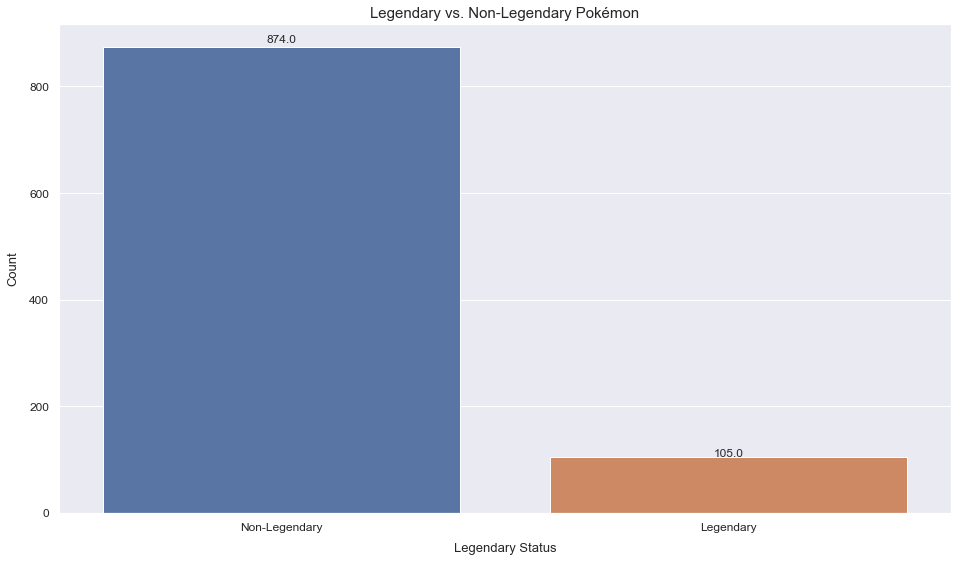

In [9]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='legendary', 
                  data=pokedex, 
                  order=pokedex['legendary'].value_counts().index)
show_values(p)

fontsize = 15
plt.xlabel('Legendary Status', fontsize=fontsize-2, labelpad=10)
plt.ylabel('Count', fontsize=fontsize-2, labelpad=10)
plt.xticks(fontsize=fontsize-3, ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])
plt.yticks(fontsize=fontsize-3)
plt.title('Legendary vs. Non-Legendary Pokémon', fontsize=fontsize);

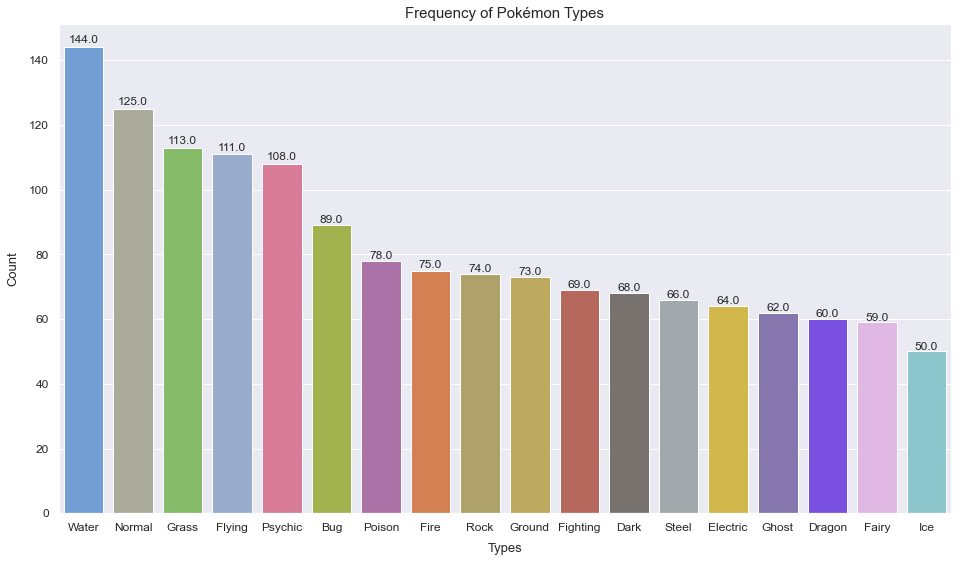

In [10]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='type', 
                  data=type_stats, 
                  palette=type_colors, 
                  order=type_stats['type'].value_counts().index)
show_values(p)

fontsize = 15
plt.xlabel('Types', fontsize=fontsize-2, labelpad=10)
plt.ylabel('Count', fontsize=fontsize-2, labelpad=10)
plt.xticks(fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-3)
plt.title('Frequency of Pokémon Types', fontsize=fontsize);

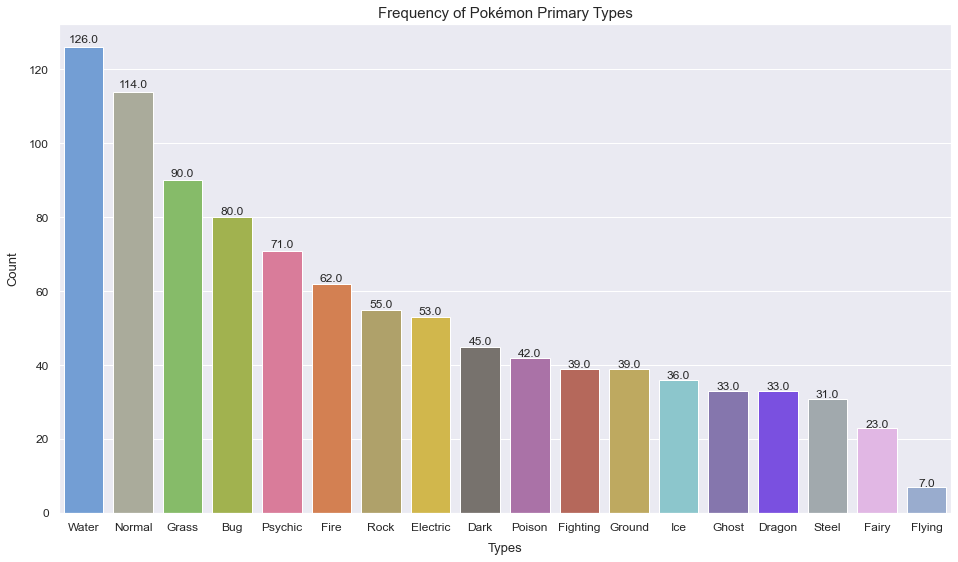

In [11]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='primary_type', 
                  data=pokedex, 
                  palette=type_colors, 
                  order=pokedex['primary_type'].value_counts().index)
show_values(p)

fontsize = 15
plt.xlabel('Types', fontsize=fontsize-2, labelpad=10)
plt.ylabel('Count', fontsize=fontsize-2, labelpad=10)
plt.xticks(fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-3)
plt.title('Frequency of Pokémon Primary Types', fontsize=fontsize);

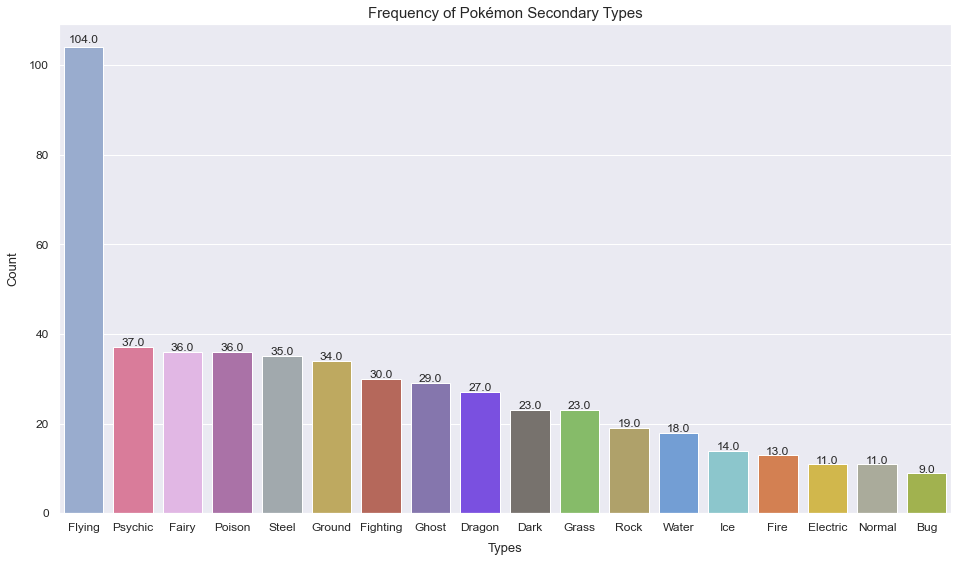

In [12]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='secondary_type', 
                  data=pokedex, 
                  palette=type_colors, 
                  order=pokedex['secondary_type'].value_counts().index)
show_values(p)

fontsize = 15
plt.xlabel('Types', fontsize=fontsize-2, labelpad=10)
plt.ylabel('Count', fontsize=fontsize-2, labelpad=10)
plt.xticks(fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-3)
plt.title('Frequency of Pokémon Secondary Types', fontsize=fontsize);

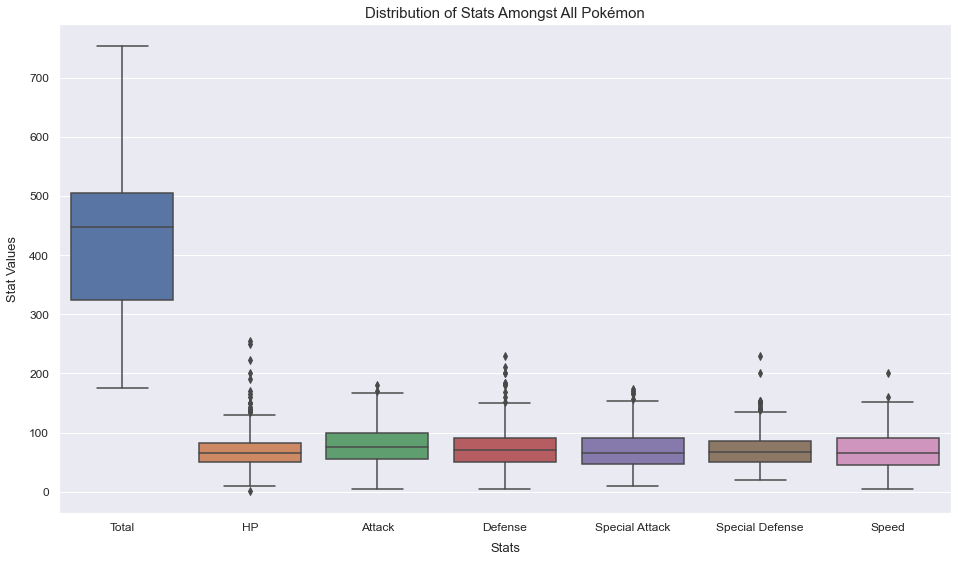

In [13]:
plt.figure(figsize=(16,9))
bp = sns.boxplot(data=pokedex[['total', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']])

fontsize = 15
plt.xlabel('Stats', fontsize=fontsize-2, labelpad=10)
plt.ylabel('Stat Values', fontsize=fontsize-2, labelpad=10)
bp.set_xticklabels(['Total', 'HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'], fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-3)
plt.title('Distribution of Stats Amongst All Pokémon', fontsize=fontsize);

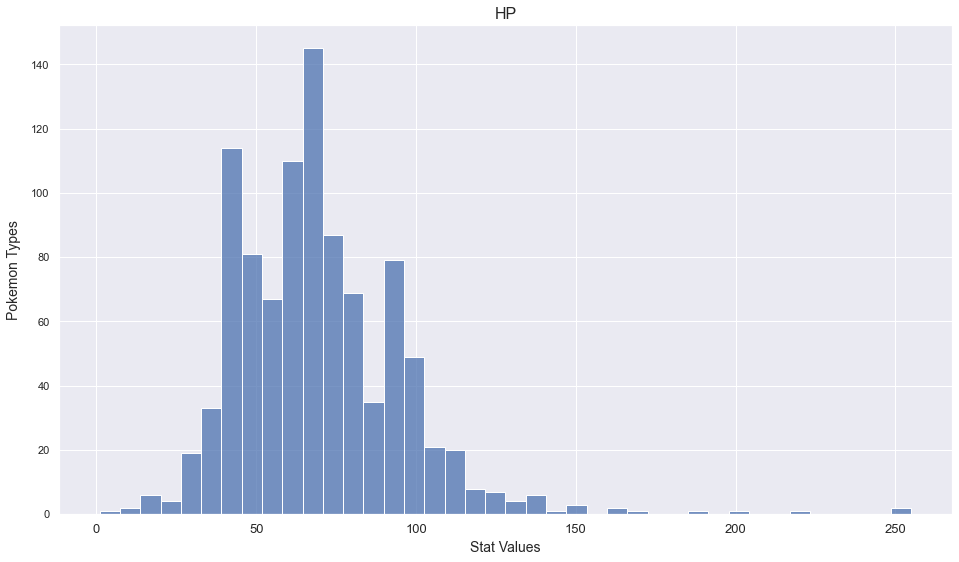

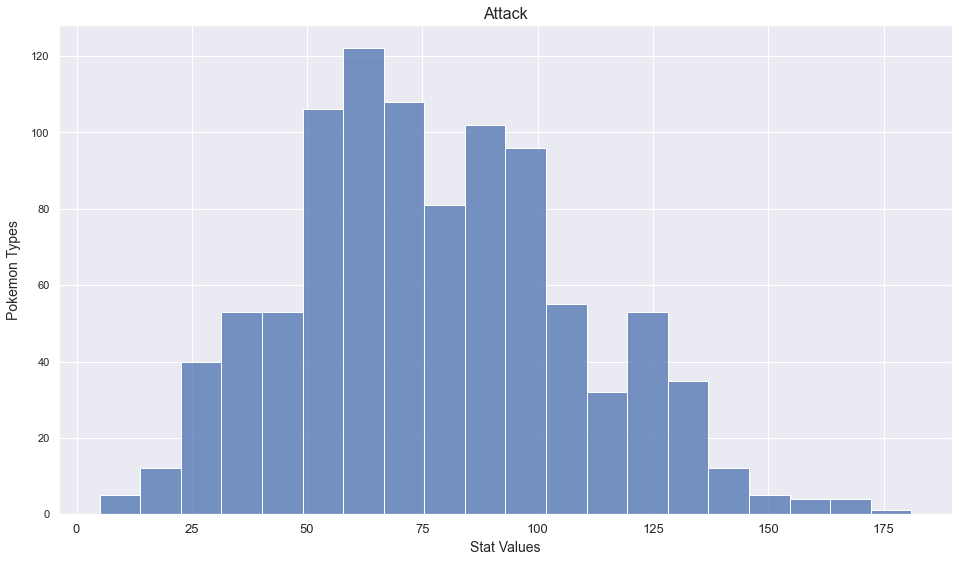

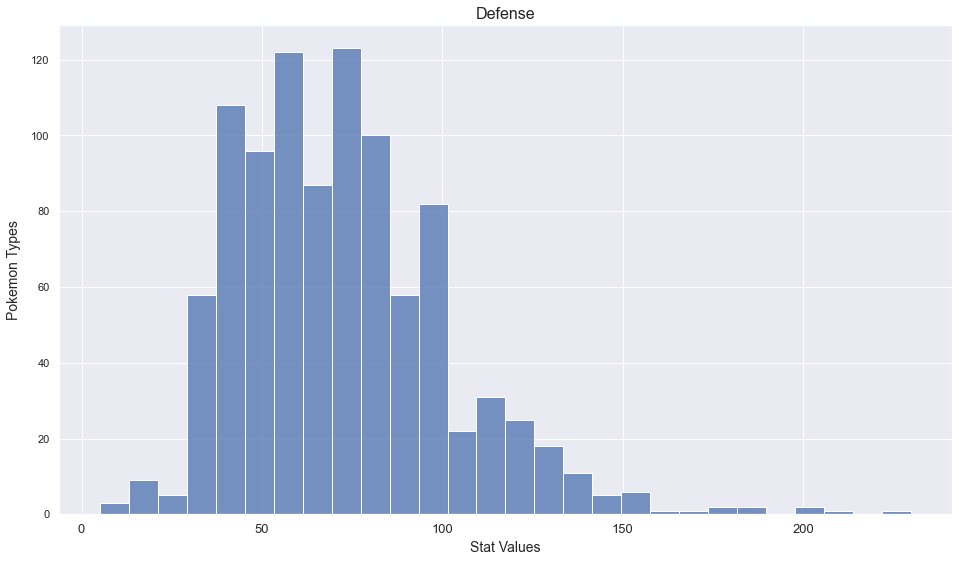

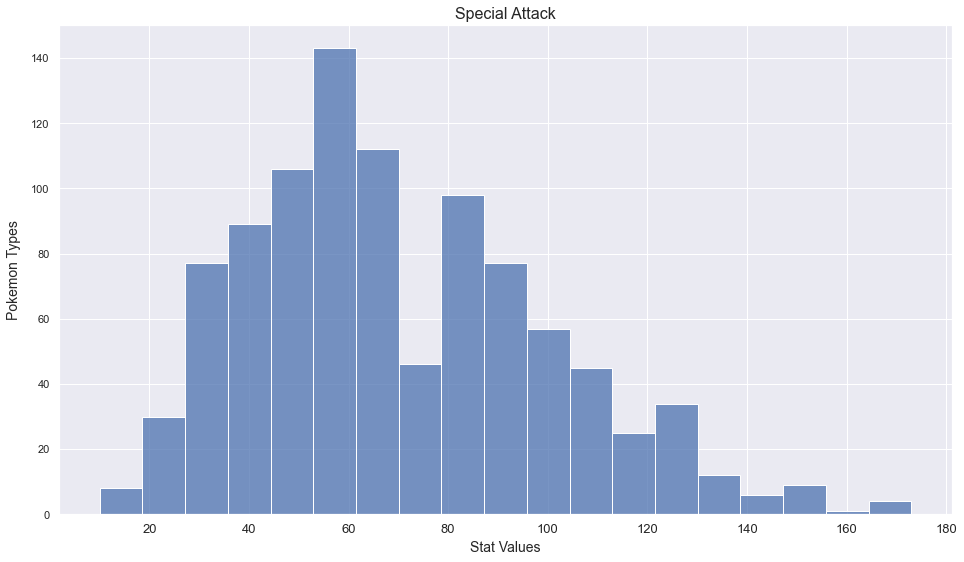

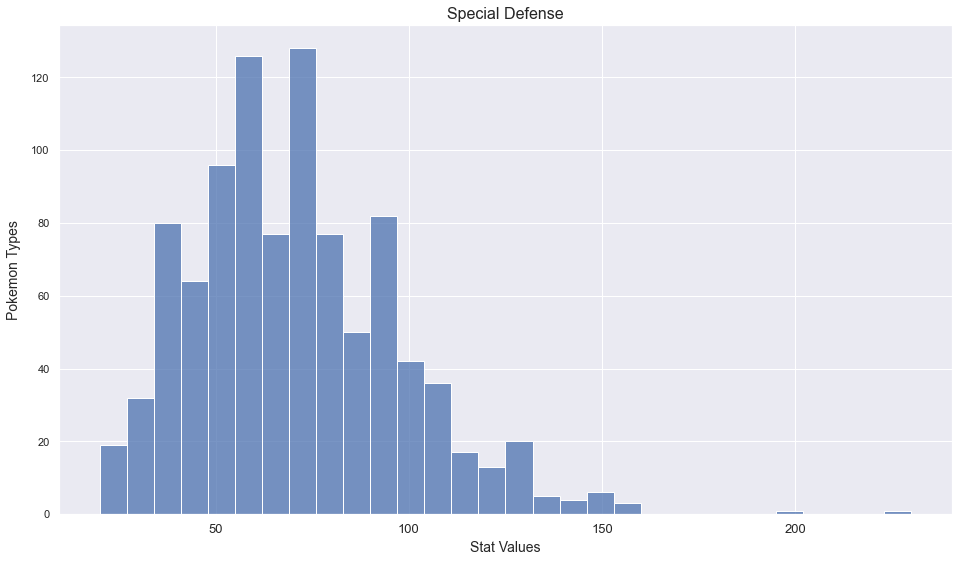

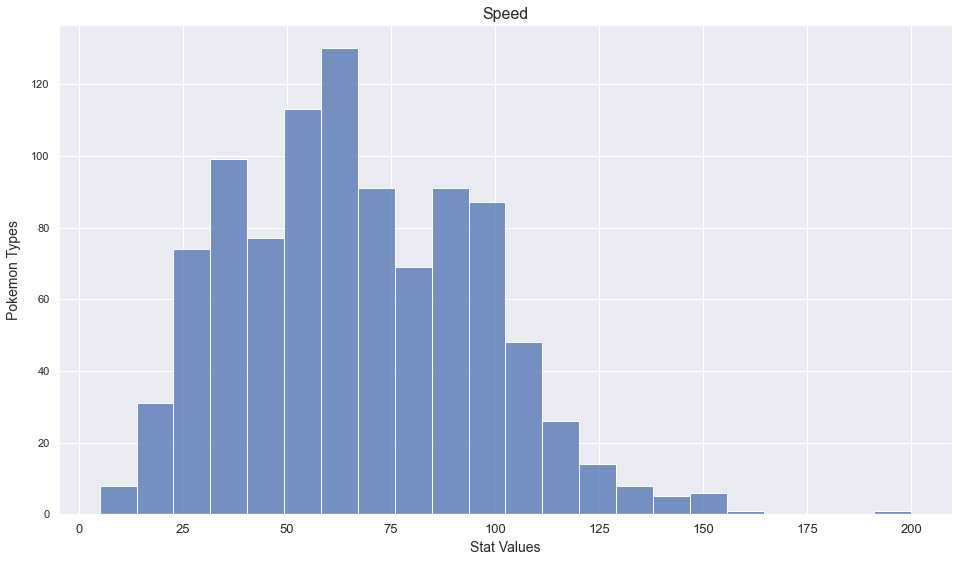

In [14]:
for i in ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']:

    plt.figure(figsize=(16,9))

    sns.histplot(x=i, 
                 data=pokedex);
        
    if i == 'sp_atk':
        i = 'Special Attack'
    elif i == 'sp_def':
        i = 'Special Defense'

    fontsize = 16
    plt.xlabel('Stat Values', fontsize=fontsize-2, labelpad=5)
    plt.ylabel('Pokemon Types', fontsize=fontsize-2, labelpad=10)
    plt.xticks(fontsize=fontsize-3)
    plt.yticks(fontsize=fontsize-5)
        
    if i == 'hp': 
        plt.title('{}'.format(i.upper()), fontsize=fontsize);
    else:
        plt.title('{}'.format(i.title()), fontsize=fontsize);

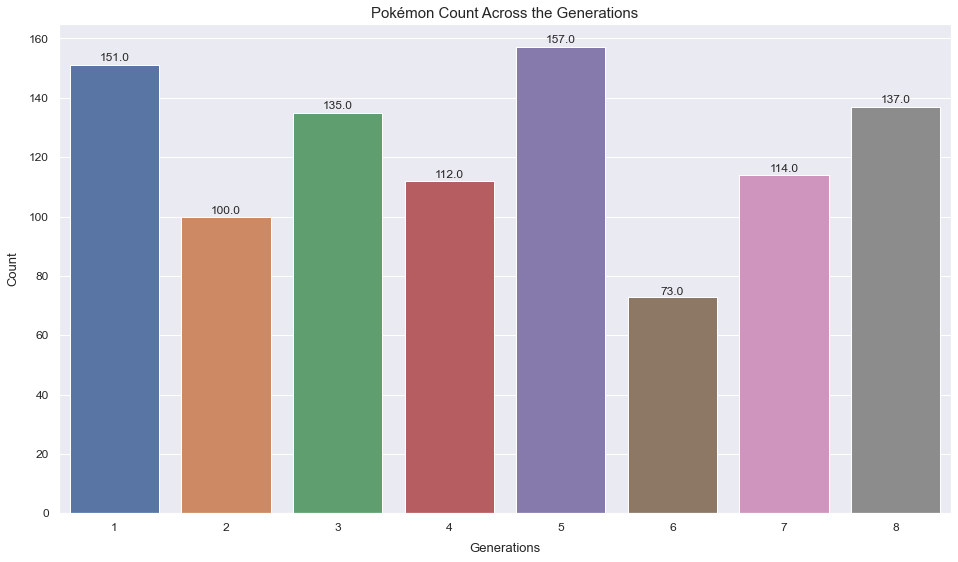

In [15]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='generation', 
                  data=pokedex)
show_values(p)

fontsize = 15
plt.xlabel('Generations', fontsize=fontsize-2, labelpad=10)
plt.ylabel('Count', fontsize=fontsize-2, labelpad=10)
plt.xticks(fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-3)
plt.title('Pokémon Count Across the Generations', fontsize=fontsize);

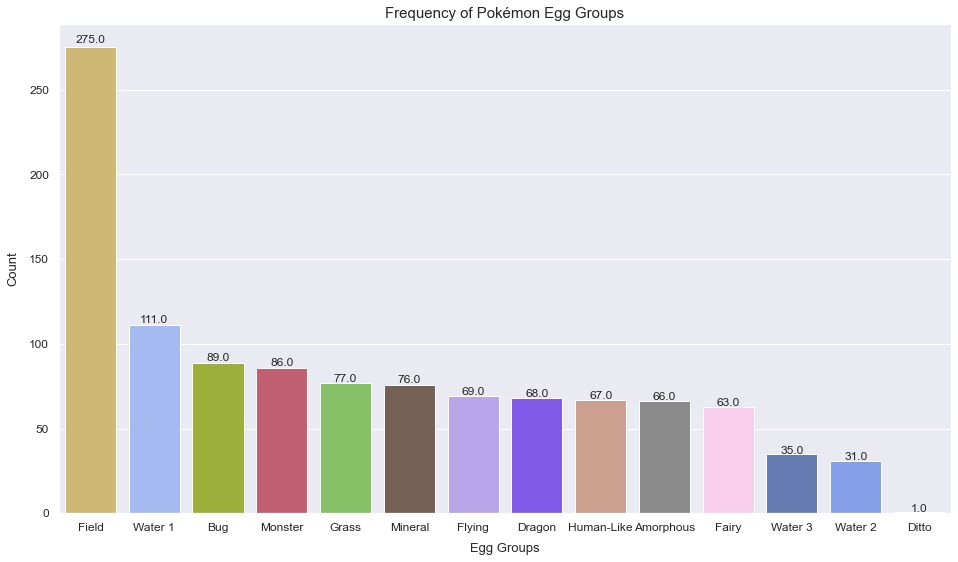

In [16]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='egg_group', 
                  data=egg_stats, 
                  palette=egg_colors,
                  order=egg_stats['egg_group'].value_counts().index)
show_values(p)

fontsize = 15
plt.xlabel('Egg Groups', fontsize=fontsize-2, labelpad=10)
plt.ylabel('Count', fontsize=fontsize-2, labelpad=10)
plt.xticks(fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-3)
plt.title('Frequency of Pokémon Egg Groups', fontsize=fontsize);

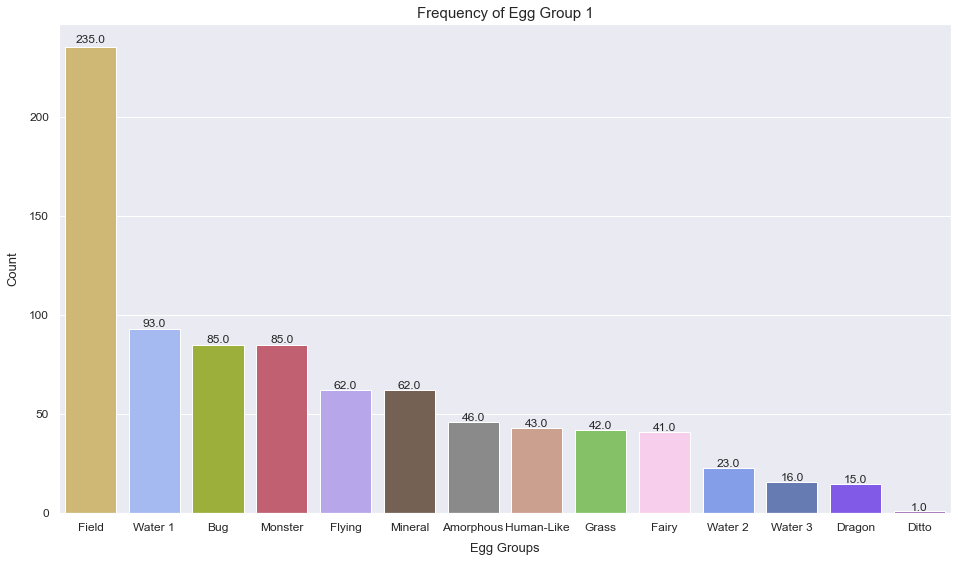

In [17]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='egg_group_1', 
                  data=pokedex, 
                  palette=egg_colors,
                  order=pokedex['egg_group_1'].value_counts().index)
show_values(p)

fontsize = 15
plt.xlabel('Egg Groups', fontsize=fontsize-2, labelpad=10)
plt.ylabel('Count', fontsize=fontsize-2, labelpad=10)
plt.xticks(fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-3)
plt.title('Frequency of Egg Group 1', fontsize=fontsize);

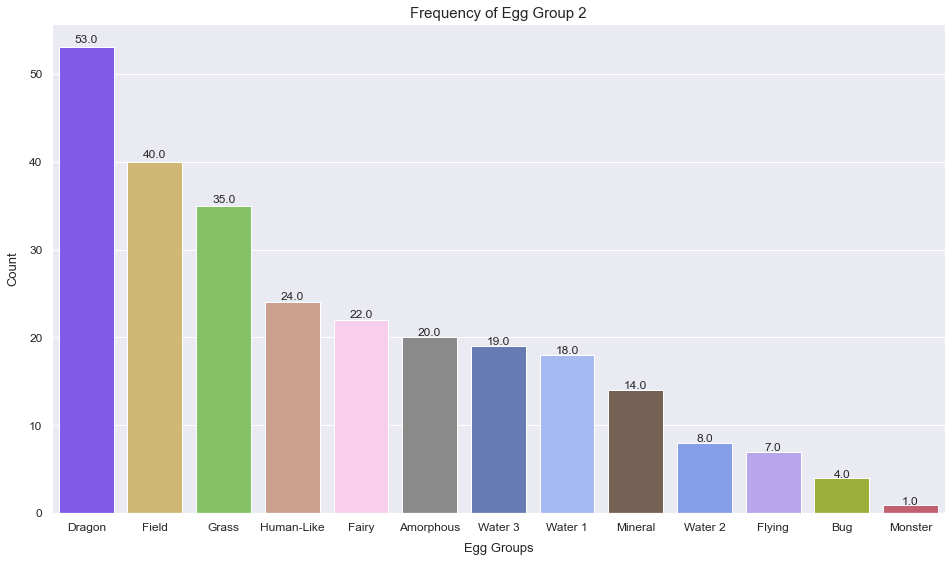

In [18]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='egg_group_2', 
                  data=pokedex,  
                  palette=egg_colors,
                  order=pokedex['egg_group_2'].value_counts().index)
show_values(p)

fontsize = 15
plt.xlabel('Egg Groups', fontsize=fontsize-2, labelpad=10)
plt.ylabel('Count', fontsize=fontsize-2, labelpad=10)
plt.xticks(fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-3)
plt.title('Frequency of Egg Group 2', fontsize=fontsize);

## 2. Is there a correlation between a Pokemon's Legendary status and its stats?

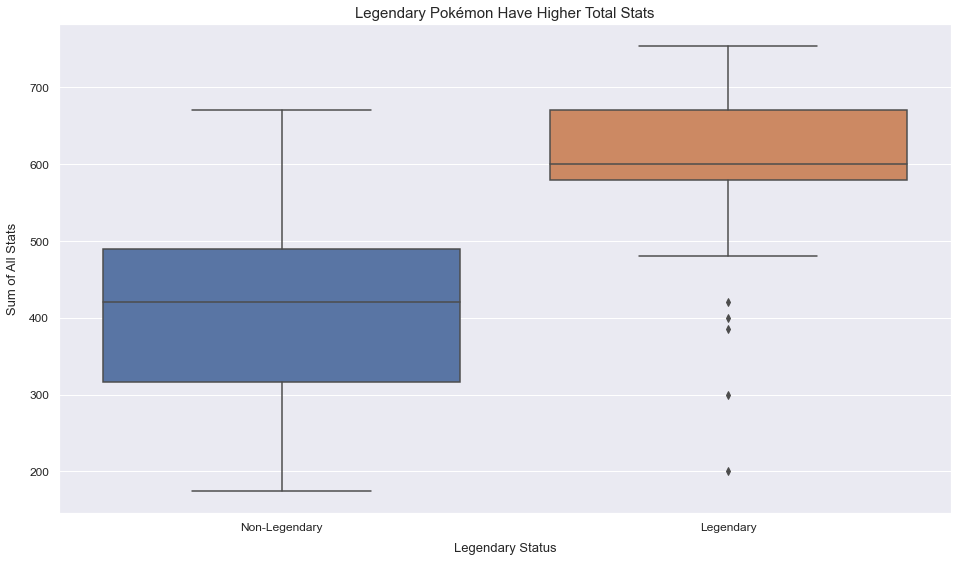

In [19]:
plt.figure(figsize=(16,9))
sns.boxplot(x='legendary', 
            y='total', 
            data=pokedex)

fontsize = 15
plt.xlabel('Legendary Status', fontsize=fontsize-2, labelpad=10)
plt.ylabel('Sum of All Stats', fontsize=fontsize-2, labelpad=10)
plt.xticks(fontsize=fontsize-3, ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])
plt.yticks(fontsize=fontsize-3)
plt.title('Legendary Pokémon Have Higher Total Stats', fontsize=fontsize);

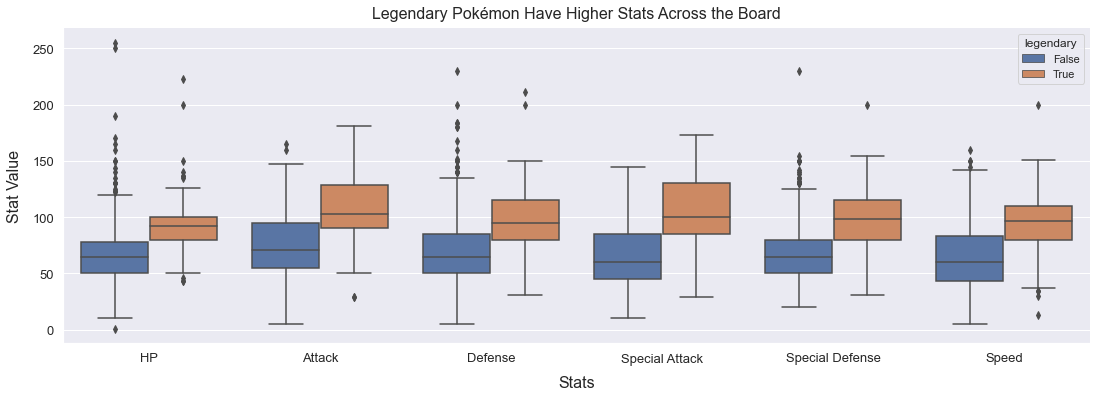

In [20]:
legendary_facet = pokedex[['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'legendary']].melt(id_vars='legendary')

sns.catplot(data=legendary_facet, 
            x="variable", 
            y="value", 
            hue="legendary", 
            kind = 'box', 
            height=5, 
            aspect=3, 
            legend_out=False)

fontsize = 16
plt.xlabel('Stats', fontsize=fontsize, labelpad=10)
plt.ylabel('Stat Value', fontsize=fontsize, labelpad=10)
plt.xticks(fontsize=fontsize-3, 
           ticks=[0, 1, 2, 3, 4, 5], 
           labels=['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'])
plt.yticks(fontsize=fontsize-3)
plt.title('Legendary Pokémon Have Higher Stats Across the Board', fontsize=fontsize, pad=10);

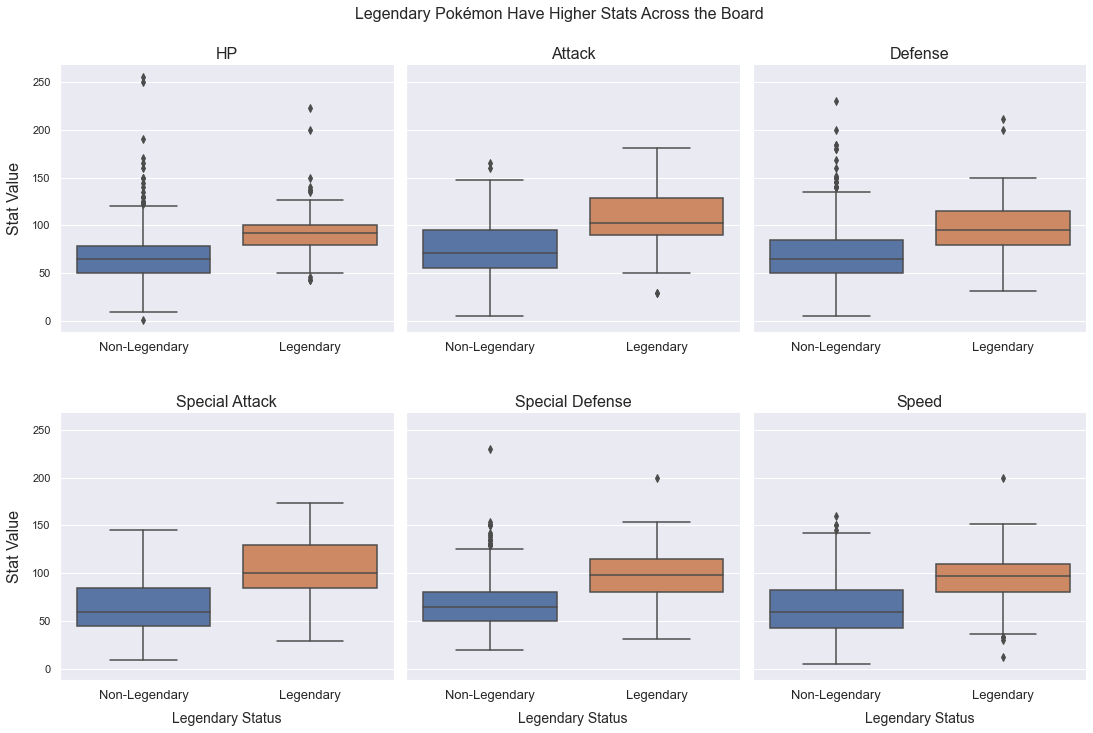

In [21]:
cp = sns.catplot(data=legendary_facet, 
                 x='legendary', 
                 y='value',
                 col='variable', 
                 kind='box', 
                 col_wrap=3, 
                 sharex=False)

fontsize = 16
cp.set_xticklabels(['Non-Legendary', 'Legendary'], fontsize=fontsize-3)
cp.set_xlabels('Legendary Status', labelpad=10, fontsize=fontsize-2)
cp.set_ylabels('Stat Value', labelpad=10, fontsize=fontsize)
cp.fig.suptitle('Legendary Pokémon Have Higher Stats Across the Board', fontsize=fontsize)
cp.fig.subplots_adjust(top=.9)
axes = cp.axes.flatten()
axes[0].set_title("HP", fontsize=fontsize)
axes[1].set_title("Attack", fontsize=fontsize)
axes[2].set_title("Defense", fontsize=fontsize)
axes[3].set_title("Special Attack", fontsize=fontsize)
axes[4].set_title("Special Defense", fontsize=fontsize)
axes[5].set_title("Speed", fontsize=fontsize)
plt.subplots_adjust(hspace=0.3);

### Correlations Between Legendary Status and Stats
#### Conclusion:
- Pokemon tend to have higher stats than non-Legendary Pokemon. No one stat stands out as more indicative than the other. I believe using Pokemon stats will be a deciding factor in correctly predicting a Pokemon's Legendary status.

## 3. Is there a correlation between a Pokemon's Legendary status and its catch rate?

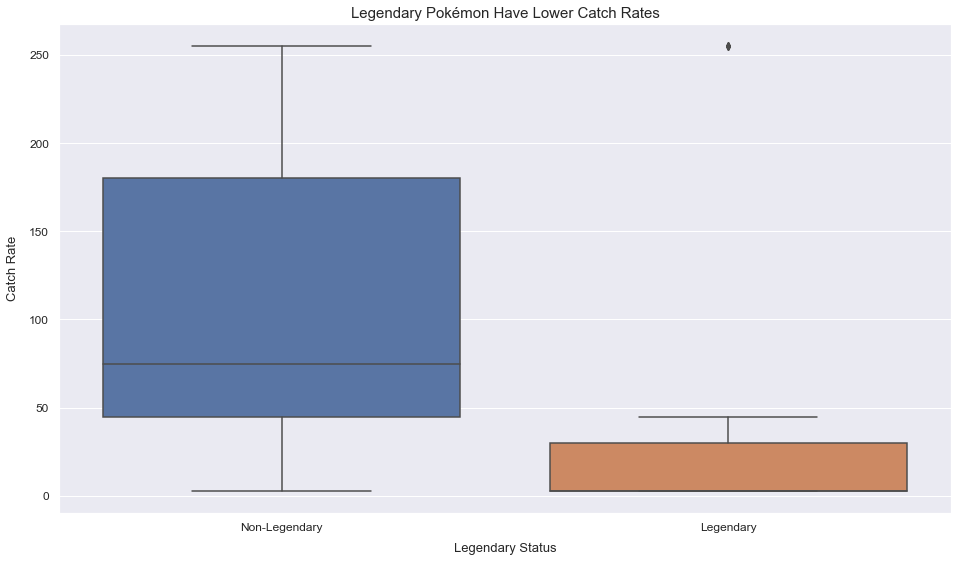

In [22]:
plt.figure(figsize=(16,9))
sns.boxplot(x='legendary', 
            y='catch_rate', 
            data=pokedex);

fontsize = 15
plt.xlabel('Legendary Status', fontsize=fontsize-2, labelpad=10)
plt.ylabel('Catch Rate', fontsize=fontsize-2, labelpad=10)
plt.xticks(fontsize=fontsize-3, ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])
plt.yticks(fontsize=fontsize-3)
plt.title('Legendary Pokémon Have Lower Catch Rates', fontsize=fontsize);

### Correlation Between Legendary Status and Catch Rate
#### Conclusion:
- There is a strong correlation between a Pokemon's catch rate and whether or not it is a Legendary Pokemon. I believe using a Pokemon's catch rate in combination with its stats will result in a high success rate in predicting the Pokemon's Legendary status.

## 4. What does the type distribution look like amongst the Legendary Pokemon?

In [23]:
# Melt types to take a look at types overall and not primary and secondary split
type_legendary = pokedex[['primary_type', 'secondary_type', 'legendary']]
type_legendary = type_legendary.melt(id_vars=['legendary'],
                                 value_vars=['primary_type', 'secondary_type'])
type_legendary = type_legendary.drop(columns=['variable']).rename(columns={'value': 'type'})

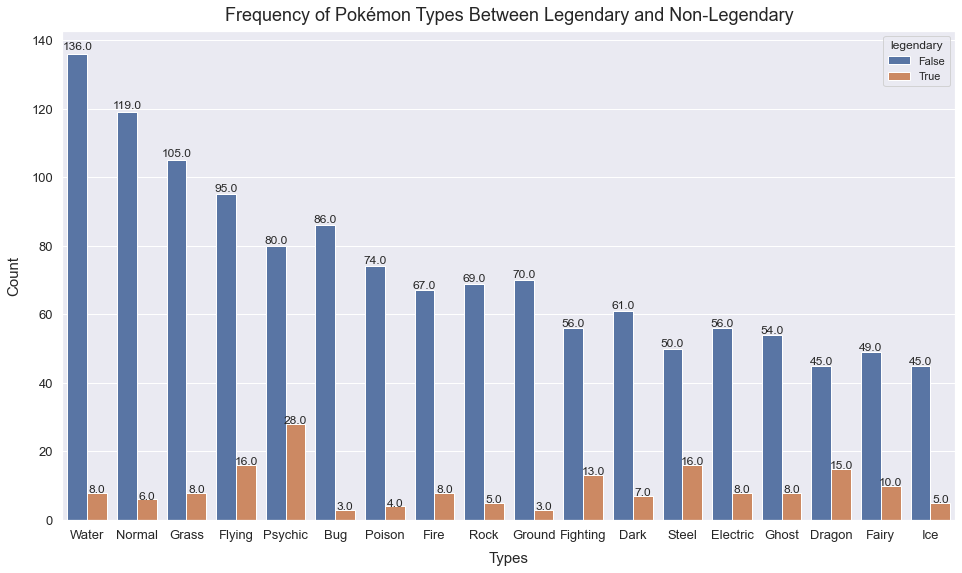

In [24]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='type', 
                  data=type_legendary, 
                  hue='legendary', 
                  order=type_stats['type'].value_counts().index)
show_values(p)

fontsize = 18
plt.xlabel('Types', fontsize=fontsize-3, labelpad=10)
plt.ylabel('Count', fontsize=fontsize-3, labelpad=10)
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)
plt.title('Frequency of Pokémon Types Between Legendary and Non-Legendary', fontsize=fontsize, pad=10);

### Type distribution amongst the Legendary Pokemon
#### Conclusion:
- Every type has at least one Pokemon with a Legendary status. There is no obvious trend that points to me being able to use typing as an indicator for Legendary status.

## 5. Is there a correlation between a Pokemon's primary and secondary types and its stats?

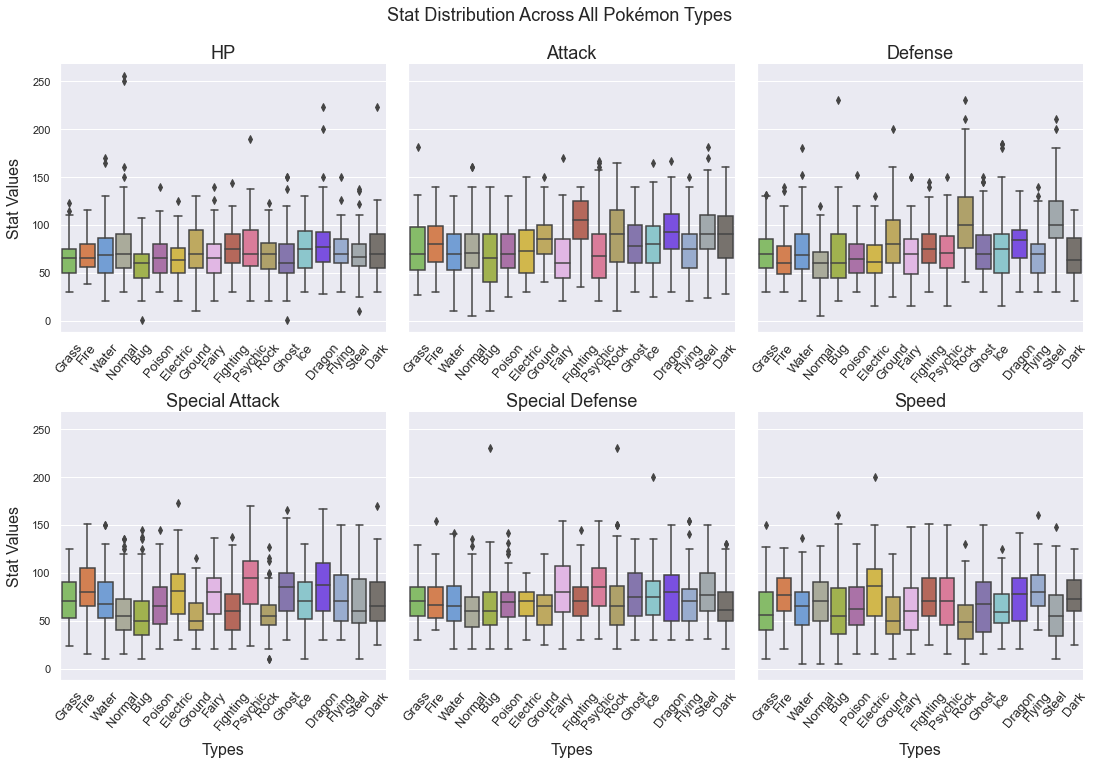

In [25]:
primary_type_facet = pokedex[['primary_type', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].melt(id_vars='primary_type')

cp = sns.catplot(data=type_stats[['type', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].melt(id_vars='type'), 
                 x='type', 
                 y='value',
                 col='variable', 
                 kind='box', 
                 col_wrap=3,
                 palette=type_colors, 
                 order=type_order, 
                 sharex=False)

fontsize = 18
cp.set_xticklabels(rotation=50, fontsize=fontsize-5)
cp.set_xlabels('Types', labelpad=10, fontsize=fontsize-2)
cp.set_ylabels('Stat Values', labelpad=10, fontsize=fontsize-2)
cp.fig.suptitle('Stat Distribution Across All Pokémon Types', fontsize=fontsize)
cp.fig.subplots_adjust(top=.9)
axes = cp.axes.flatten()
axes[0].set_title("HP", fontsize=fontsize)
axes[1].set_title("Attack", fontsize=fontsize)
axes[2].set_title("Defense", fontsize=fontsize)
axes[3].set_title("Special Attack", fontsize=fontsize)
axes[4].set_title("Special Defense", fontsize=fontsize)
axes[5].set_title("Speed", fontsize=fontsize)
plt.subplots_adjust(hspace=0.3);

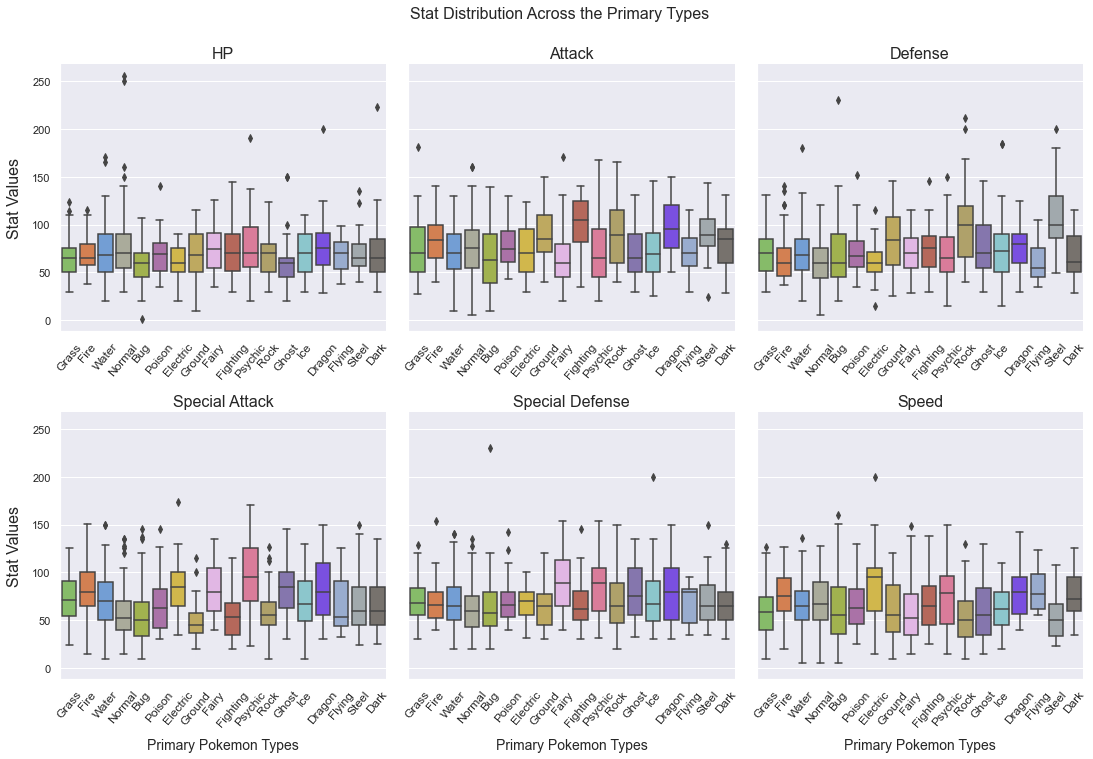

In [26]:
primary_type_facet = pokedex[['primary_type', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].melt(id_vars='primary_type')

cp = sns.catplot(data=primary_type_facet, 
                 x='primary_type', 
                 y='value',
                 col='variable', 
                 kind='box', 
                 col_wrap=3,
                 palette=type_colors, 
                 order=type_order, 
                 sharex=False)

fontsize = 16
cp.set_xticklabels(rotation=50, fontsize=fontsize-4)
cp.set_xlabels('Primary Pokemon Types', labelpad=10, fontsize=fontsize-2)
cp.set_ylabels('Stat Values', labelpad=10, fontsize=fontsize)
cp.fig.suptitle('Stat Distribution Across the Primary Types', fontsize=fontsize)
cp.fig.subplots_adjust(top=.9)
axes = cp.axes.flatten()
axes[0].set_title("HP", fontsize=fontsize)
axes[1].set_title("Attack", fontsize=fontsize)
axes[2].set_title("Defense", fontsize=fontsize)
axes[3].set_title("Special Attack", fontsize=fontsize)
axes[4].set_title("Special Defense", fontsize=fontsize)
axes[5].set_title("Speed", fontsize=fontsize)
plt.subplots_adjust(hspace=0.3);

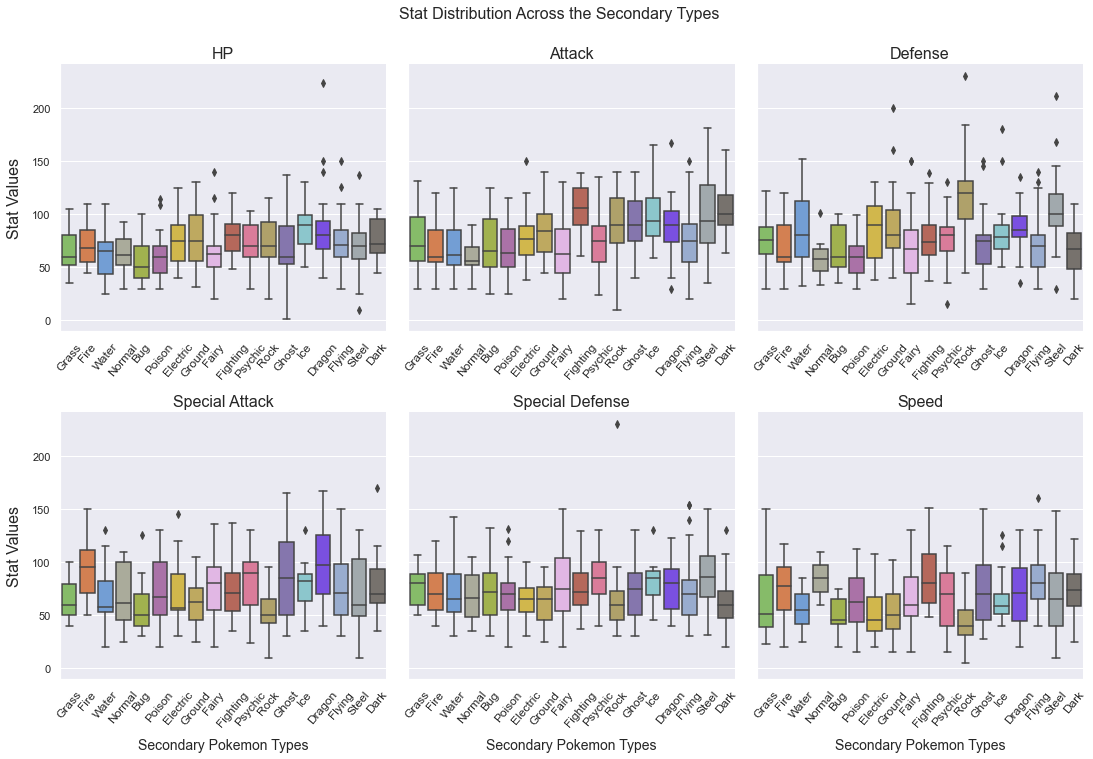

In [27]:
secondary_type_facet = pokedex[['secondary_type', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].melt(id_vars='secondary_type')

cp = sns.catplot(data=secondary_type_facet, 
                 x='secondary_type', 
                 y='value',
                 col='variable', 
                 kind='box', 
                 col_wrap=3,
                 palette=type_colors, 
                 order=type_order, 
                 sharex=False)

fontsize = 16
cp.set_xticklabels(rotation=50, fontsize=fontsize-4)
cp.set_xlabels('Secondary Pokemon Types', labelpad=10, fontsize=fontsize-2)
cp.set_ylabels('Stat Values', labelpad=10, fontsize=fontsize)
cp.fig.suptitle('Stat Distribution Across the Secondary Types', fontsize=fontsize)
cp.fig.subplots_adjust(top=.9)
axes = cp.axes.flatten()
axes[0].set_title("HP", fontsize=fontsize)
axes[1].set_title("Attack", fontsize=fontsize)
axes[2].set_title("Defense", fontsize=fontsize)
axes[3].set_title("Special Attack", fontsize=fontsize)
axes[4].set_title("Special Defense", fontsize=fontsize)
axes[5].set_title("Speed", fontsize=fontsize)
plt.subplots_adjust(hspace=0.3);

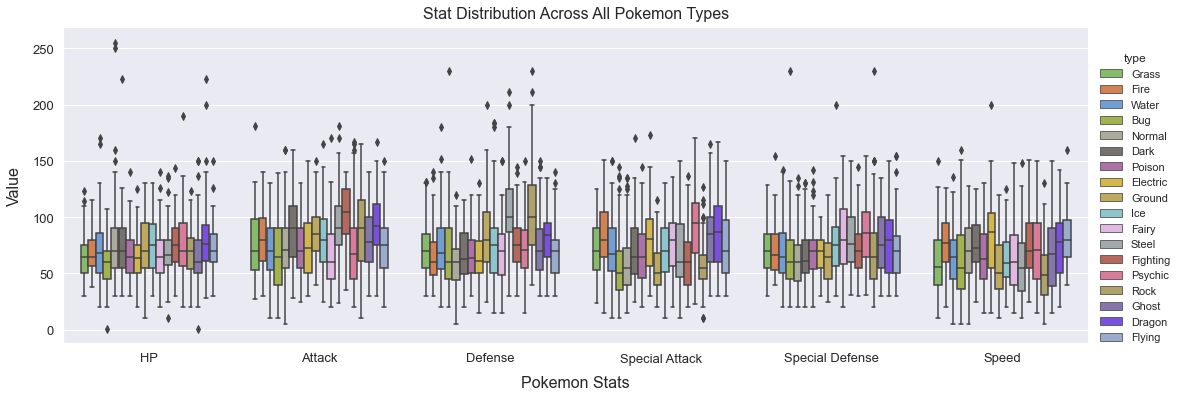

In [28]:
sns.catplot(data=type_stats[['type', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].melt(id_vars='type'), 
            x="variable", 
            y="value", 
            hue="type", 
            kind = 'box', 
            height=5, 
            aspect=3, 
            palette=type_colors)

fontsize = 16
plt.xlabel('Pokemon Stats', fontsize=fontsize, labelpad=10)
plt.ylabel('Value', fontsize=fontsize, labelpad=10)
plt.xticks(fontsize=fontsize-3, 
           ticks=[0, 1, 2, 3, 4, 5], 
           labels=['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'])
plt.yticks(fontsize=fontsize-3)
plt.title('Stat Distribution Across All Pokemon Types', fontsize=fontsize, pad=10);

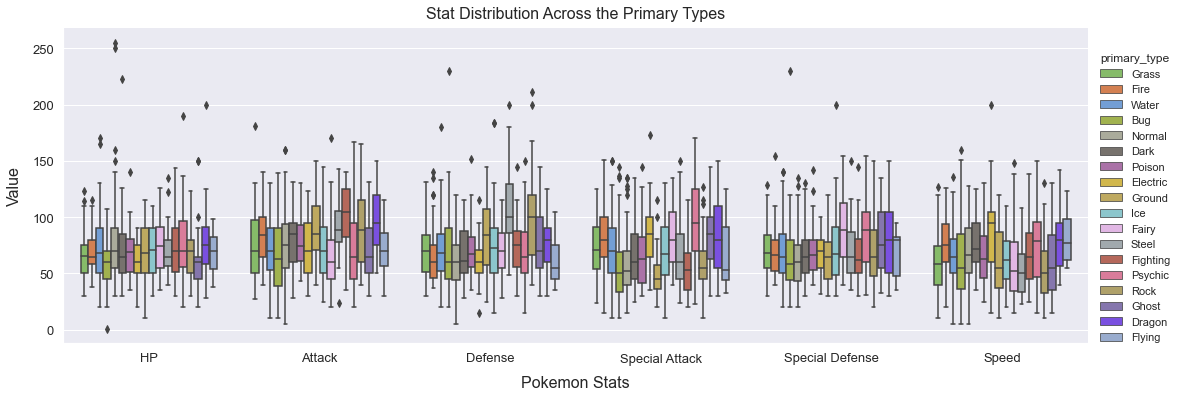

In [29]:
sns.catplot(data=primary_type_facet, 
            x="variable", 
            y="value", 
            hue="primary_type", 
            kind = 'box', 
            height=5, 
            aspect=3, 
            palette=type_colors)

fontsize = 16
plt.xlabel('Pokemon Stats', fontsize=fontsize, labelpad=10)
plt.ylabel('Value', fontsize=fontsize, labelpad=10)
plt.xticks(fontsize=fontsize-3, 
           ticks=[0, 1, 2, 3, 4, 5], 
           labels=['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'])
plt.yticks(fontsize=fontsize-3)
plt.title('Stat Distribution Across the Primary Types', fontsize=fontsize, pad=10);

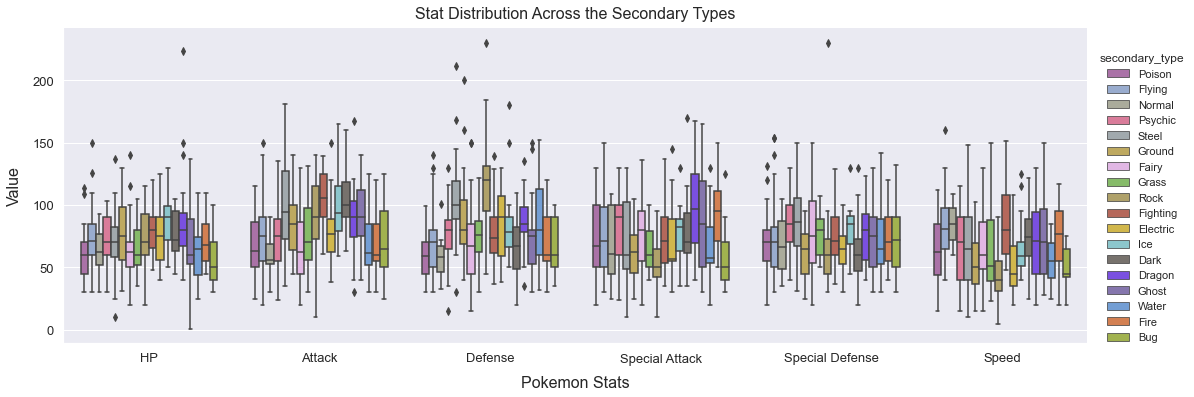

In [30]:
sns.catplot(data=secondary_type_facet, 
            x="variable", 
            y="value", 
            hue="secondary_type", 
            kind = 'box', 
            height=5, 
            aspect=3, 
            palette=type_colors)

fontsize = 16
plt.xlabel('Pokemon Stats', fontsize=fontsize, labelpad=10)
plt.ylabel('Value', fontsize=fontsize, labelpad=10)
plt.xticks(fontsize=fontsize-3, 
           ticks=[0, 1, 2, 3, 4, 5], 
           labels=['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'])
plt.yticks(fontsize=fontsize-3)
plt.title('Stat Distribution Across the Secondary Types', fontsize=fontsize, pad=10);

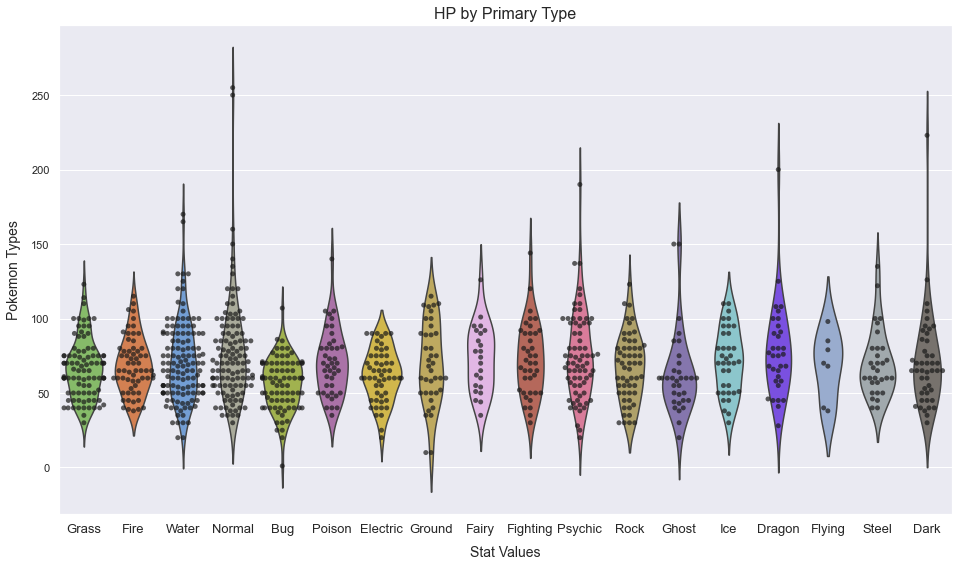

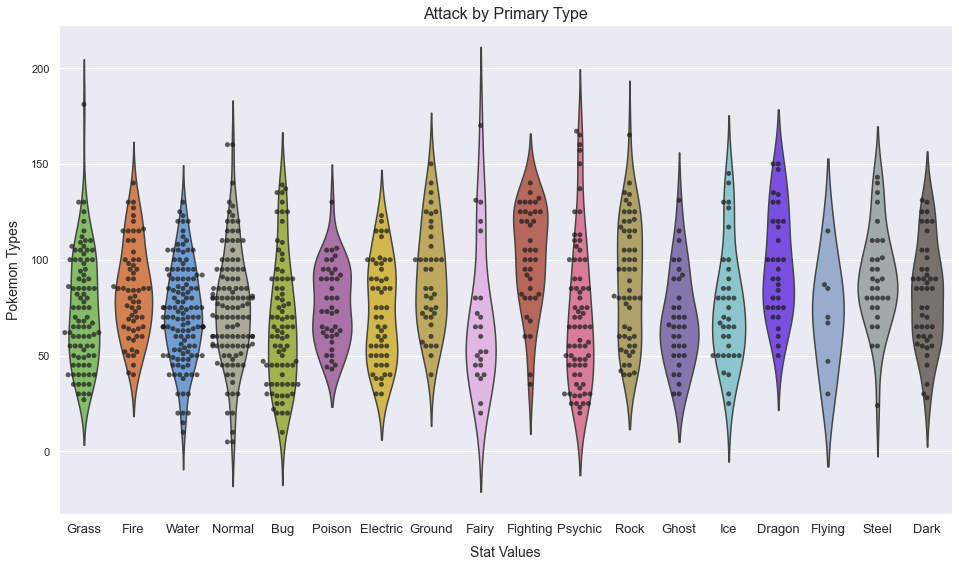

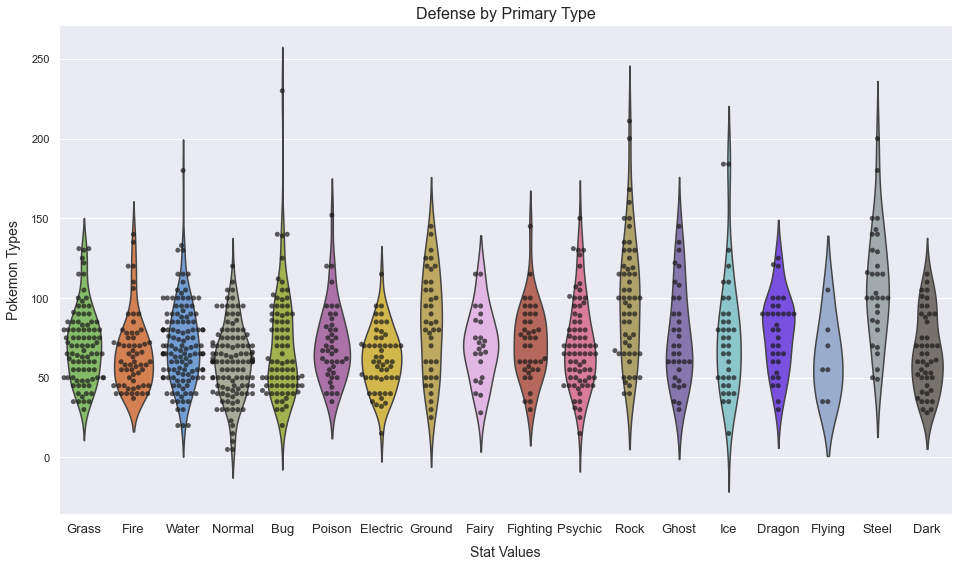

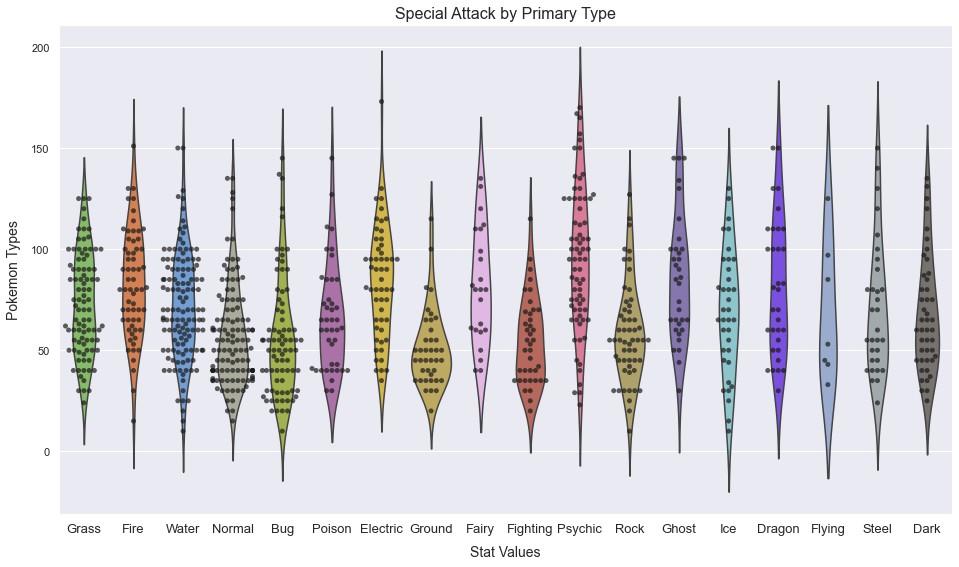

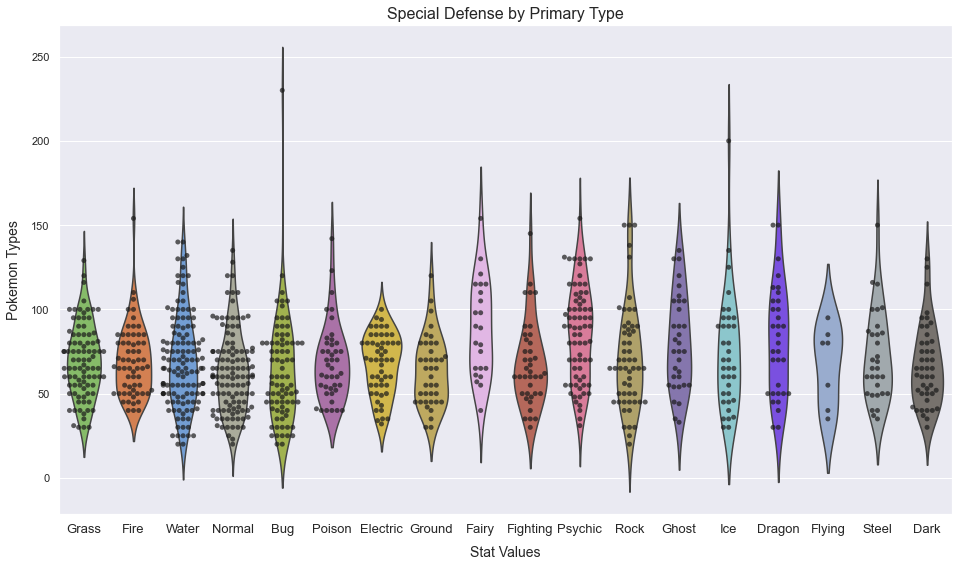

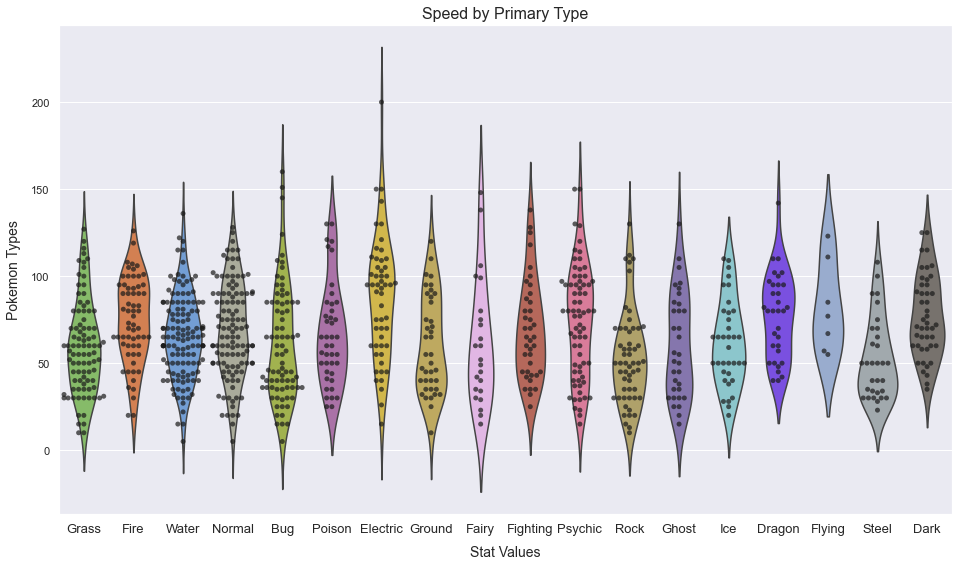

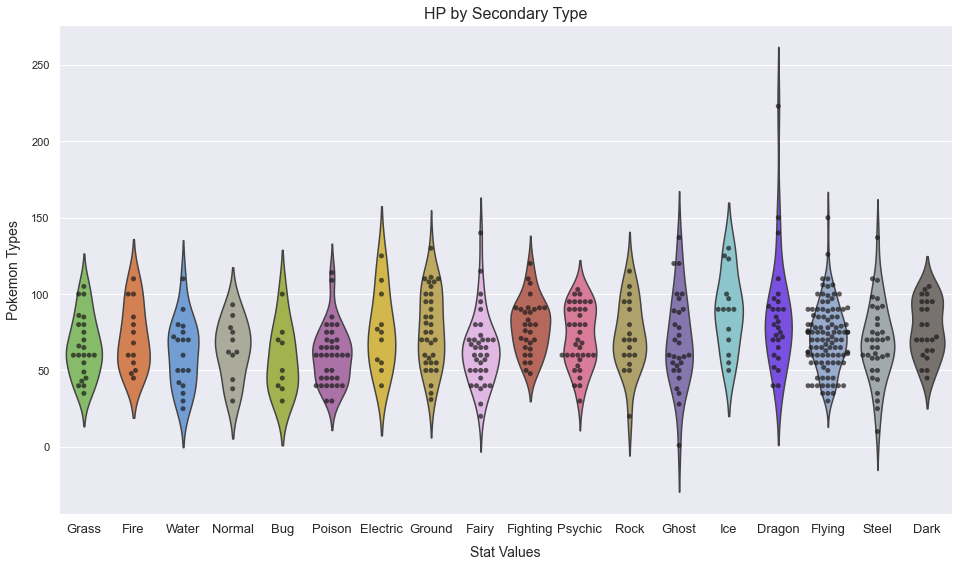

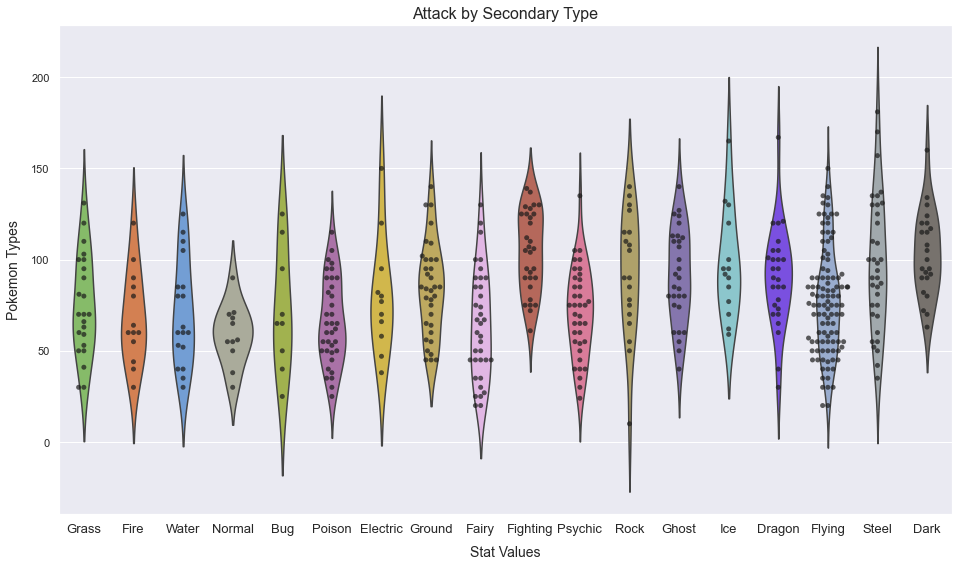

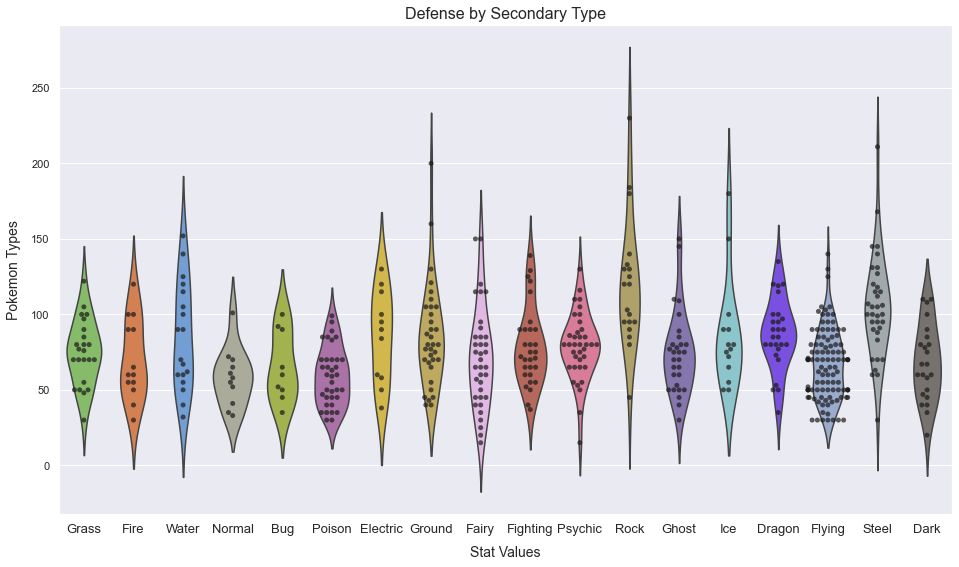

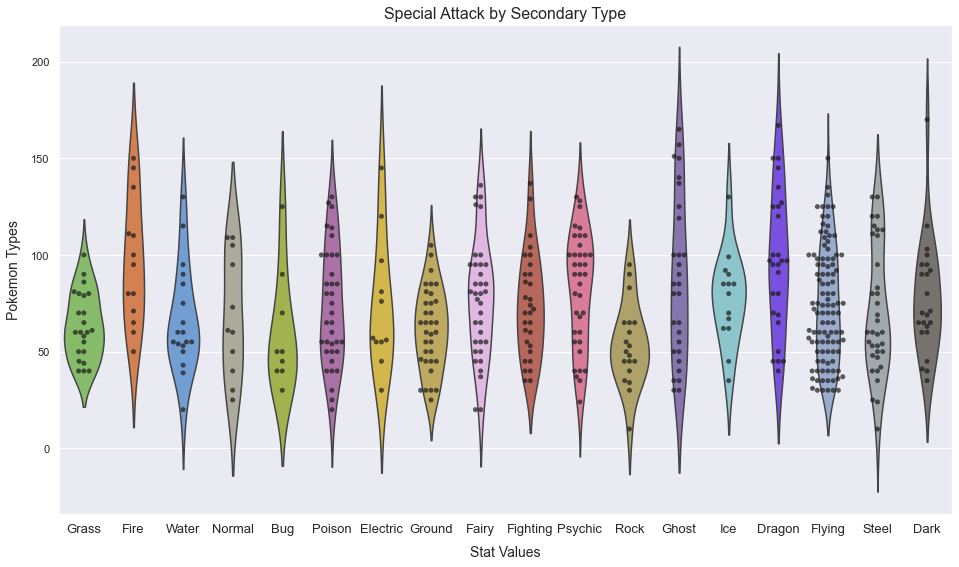

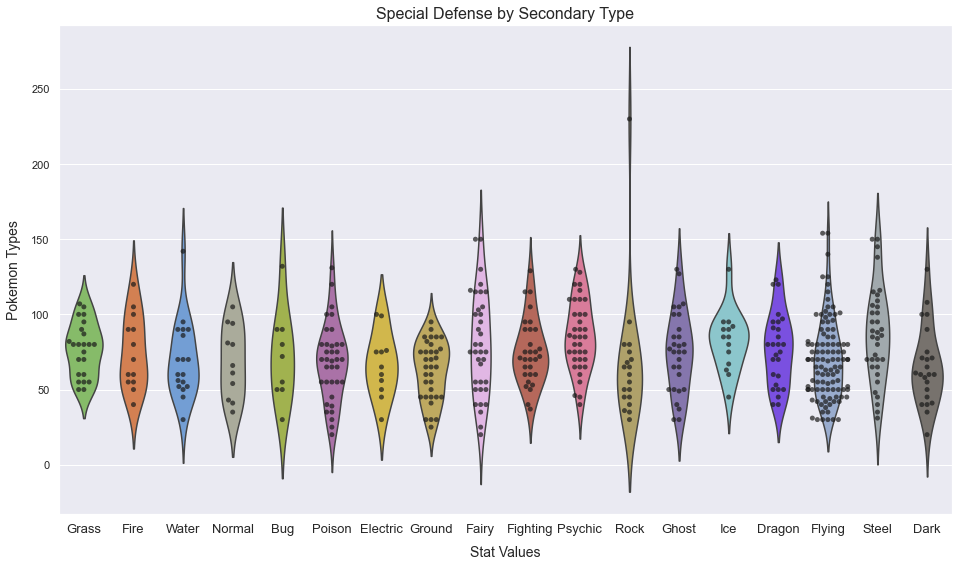

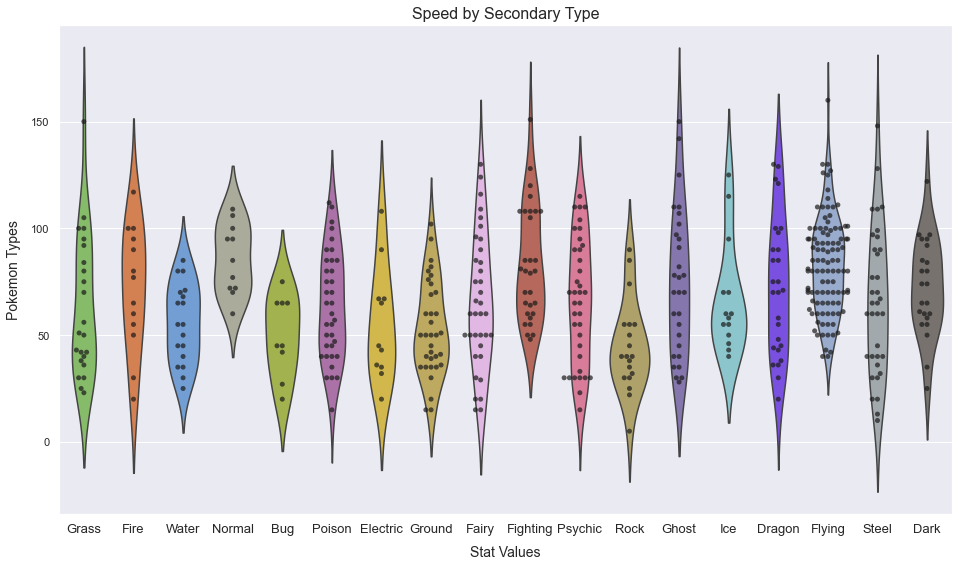

In [31]:
for i in ['primary', 'secondary']:
    for j in ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']:

        plt.figure(figsize=(16,9))

        sns.violinplot(x='{}_type'.format(i), 
                       y=j, 
                       data=pokedex, 
                       inner=None, 
                       palette=type_colors, 
                       order=type_order)

        sns.swarmplot(x='{}_type'.format(i), 
                      y=j, 
                      data=pokedex, 
                      color='k', 
                      alpha=0.7, 
                      order=type_order)
        
        if j == 'sp_atk':
            j = 'Special Attack'
        elif j == 'sp_def':
            j = 'Special Defense'

        fontsize = 16
        plt.xlabel('Stat Values', fontsize=fontsize-2, labelpad=10)
        plt.ylabel('Pokemon Types', fontsize=fontsize-2, labelpad=10)
        plt.xticks(fontsize=fontsize-3)
        plt.yticks(fontsize=fontsize-5)
        
        if j == 'hp': 
            plt.title('{} by {} Type'.format(j.upper(), i.capitalize()), fontsize=fontsize);
        else:
            plt.title('{} by {} Type'.format(j.title(), i.capitalize()), fontsize=fontsize);

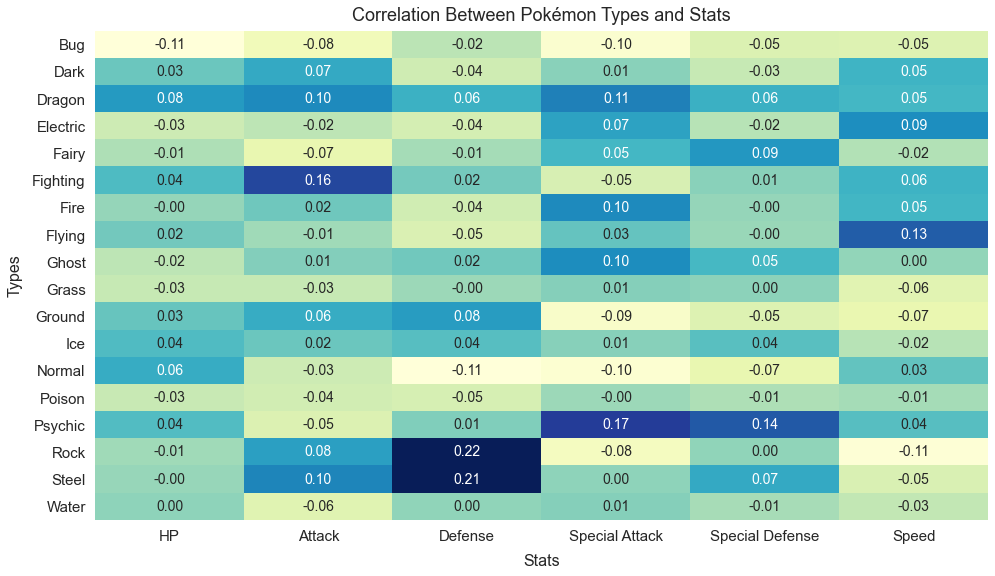

In [32]:
one_hot_type_stats = pd.get_dummies(type_stats[['type', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']], columns=['type'], prefix=['type'])
corr_type_stats = one_hot_type_stats.corr()

plt.figure(figsize=(16,9))
fontsize = 18

hm = sns.heatmap(corr_type_stats.iloc[6:, :6], 
                 cmap="YlGnBu", 
                 annot=True, 
                 annot_kws={"size": fontsize-4}, 
                 fmt=".2f", 
                 cbar=False)

hm.set_xticklabels(labels=['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'],
                   fontsize=fontsize-3)
hm.set_yticklabels(labels=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                           'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'], 
                   fontsize=fontsize-3)

hm.figure.axes[-1].set_xlabel('Stats', size=fontsize-2, labelpad=10)
hm.figure.axes[-1].set_ylabel('Types', size=fontsize-2, labelpad=10)

plt.title('Correlation Between Pokémon Types and Stats', fontsize=fontsize, pad=10);

### Correlations Between Pokemon Types and Stats
#### Conclusion:
- There are no moderate or strong correlations between a Pokemon's types and their stats. When building the model I will try with and without stats to see how they effect the predictions.

#### HP
- Very weak correlation: Bug (-0.11), Dragon (0.08)

#### Attack
- Very weak correlation: Dark (0.10), Fighting (0.16), Rock (0.08), Steel (0.10)

#### Defense
- Very weak correlation: Ground (0.08), Normal (-0.11)
- Weak correlation: Rock (0.22), Steel (0.21)

#### Special Attack
- Very weak correlation: Dragon (0.11), Fire (0.10), Ghost (0.10), Ground (-0.09), Normal (-0.10), Psychic (0.17), Rock (-0.08)

#### Special Defense
- Very weak correlation: Fairy (0.09), Psychic (0.14)

#### Speed
- Very weak correlation: Electric (0.09), Flying (0.13), Rock (-0.11)

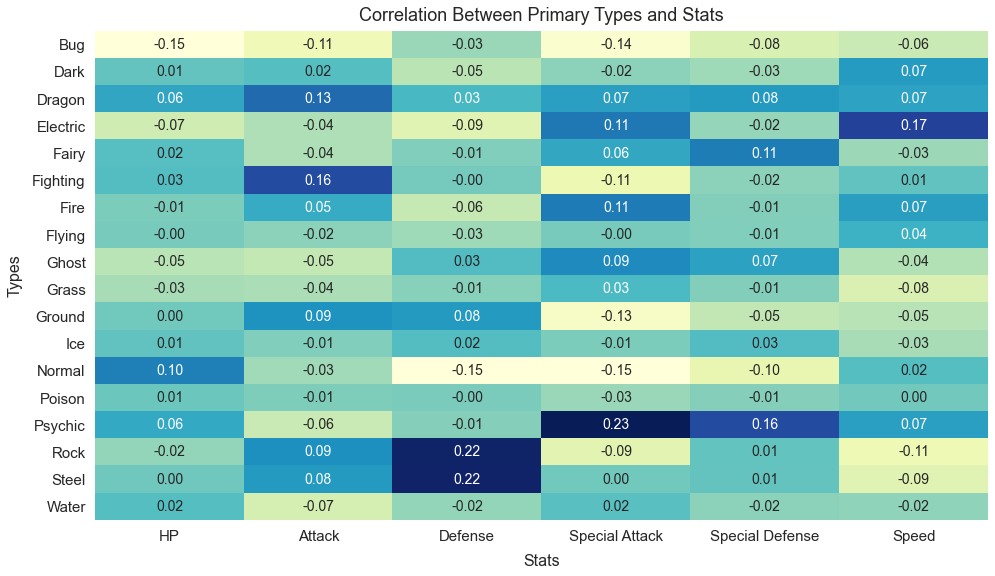

In [33]:
primary_type_stats = pokedex[['primary_type', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']]
one_hot_primary_type_stats = pd.get_dummies(primary_type_stats, columns=['primary_type'], prefix=['primary'])
corr_primary_type_stats = one_hot_primary_type_stats.corr()

plt.figure(figsize=(16,9))
fontsize = 18

hm = sns.heatmap(corr_primary_type_stats.iloc[6:, :6], 
                 cmap="YlGnBu", 
                 annot=True, 
                 annot_kws={"size": fontsize-4}, 
                 fmt=".2f", 
                 cbar=False)

hm.set_xticklabels(labels=['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'],
                   fontsize=fontsize-3)
hm.set_yticklabels(labels=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                           'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'], 
                   fontsize=fontsize-3)

hm.figure.axes[-1].set_xlabel('Stats', size=fontsize-2, labelpad=10)
hm.figure.axes[-1].set_ylabel('Types', size=fontsize-2, labelpad=10)

plt.title('Correlation Between Primary Types and Stats', fontsize=fontsize, pad=10);

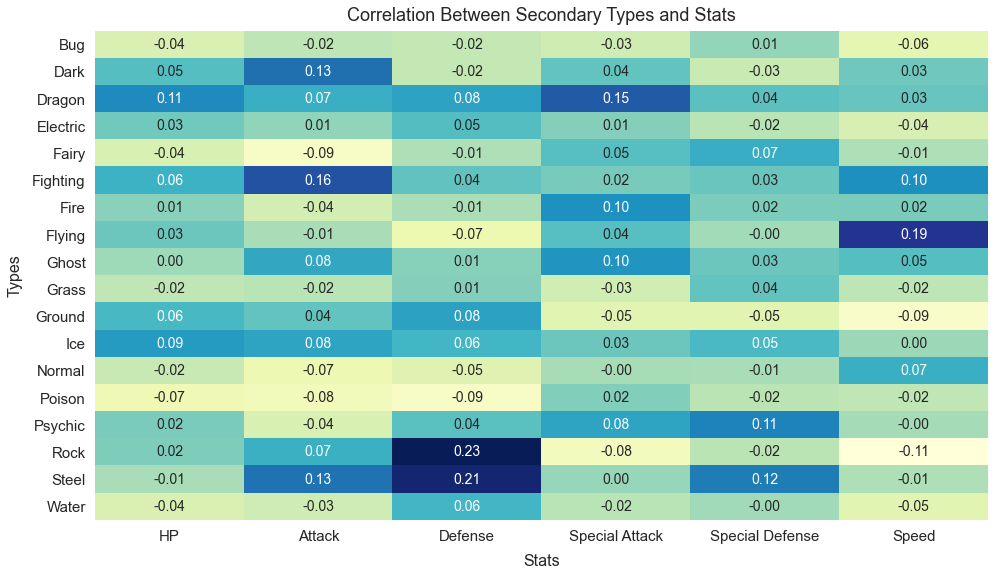

In [34]:
secondary_type_stats = pokedex[['secondary_type', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']]
one_hot_secondary_type_stats = pd.get_dummies(secondary_type_stats, columns=['secondary_type'], prefix=['secondary'])
corr_secondary_type_stats = one_hot_secondary_type_stats.corr()

plt.figure(figsize=(16,9))
fontsize = 18

hm = sns.heatmap(corr_secondary_type_stats.iloc[6:, :6], 
                 cmap="YlGnBu", 
                 annot=True, 
                 annot_kws={"size": fontsize-4}, 
                 fmt=".2f", 
                 cbar=False)

hm.set_xticklabels(labels=['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'],
                   fontsize=fontsize-3)
hm.set_yticklabels(labels=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                           'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'], 
                   fontsize=fontsize-3)

hm.figure.axes[-1].set_xlabel('Stats', size=fontsize-2, labelpad=10)
hm.figure.axes[-1].set_ylabel('Types', size=fontsize-2, labelpad=10)

plt.title('Correlation Between Secondary Types and Stats', fontsize=fontsize, pad=10);

### Correlations Between Pokemon Types and Stats
#### Conclusion:
- There are no moderate or strong correlations between a Pokemon's types and their stats. When building the model I will try with and without stats to see how they effect the predictions.

#### HP
- Extremely weak correlation: Ice secondary (0.09)
- Very weak correlation: Bug primary (-0.15), Normal primary (0.1), Dragon secondary (0.11)

#### Attack
- Extremely weak correlation: Ground primary (0.086), Rock primary (0.088), Steel primary (0.077), Water primary (-0.075), Fairy secondary (-0.088), Ghost secondary (0.076), Ice secondary (0.08), Poison seconadry (-0.076)
- Very weak correlation: Bug primary (-0.11), Dragon primary (0.13), Fighting primary (0.16), Dark secondary (0.13), Fighting secondary (0.16), Steel secondary (0.13)

#### Defense
- Extremely weak correlation: Electric primary (-0.088), Ground primary (0.077), Dragon secondary (0.083), Ground secondary (0.084), Poison secondary (-0.089)
- Very weak correlation: Normal primary (-0.15)
- Weak correlation: Rock primary (0.22), Steel primary (0.22), Rock secondary (0.23), Steel secondary (0.21)

#### Special Attack
- Extremely weak correlation: Ghost primary (0.094), Rock primary (-0.093), Ghost secondary (0.097), Psychic secondary (0.081), Rock secondary (-0.079)
- Very weak correlation: Bug primary (-0.14), Electric primary (0.11), Fighting primary (-0.11), Fire primary (0.11), Ground primary (-0.13), Normal primary (-0.15), Dragon secondary (0.15), Fire secondary (0.1)
- Weak correlation: Psychic primary (0.23)

#### Special Defense
- Extremely weak correlation: Bug primary (-0.078), Dragon primary (0.076), Normal primary (-0.098)
- Very weak correlation: Fairy primary (0.11), Psychic primary (0.16), Psychic secondary (0.11), Steel secondary (0.12)

#### Speed
- Extremely weak correlation: Dark primary (0.074), Fire primary (0.074), Grass primary (-0.081), Steel primary (-0.089), Ground secondary (-0.091)
- Very weak correlation: Electric primary (0.17), Rock primary (-0.11), Fighting secondary (0.10), Flying secondary (0.19), Rock secondary (-0.11)

## 6. Is there a correlation between a Pokemon's egg groups and primary and secondary types?

In [35]:
# Melt types and egg group to take a bigger picture view of the correlations
type_egg = pokedex.melt(id_vars=['egg_group_1', 'egg_group_2', 'hp'],
                        value_vars=['primary_type', 'secondary_type'])
type_egg = type_egg.drop(columns=['variable']).rename(columns={'value': 'type'})
type_egg = type_egg.melt(id_vars=['type', 'hp'],
                         value_vars=['egg_group_1', 'egg_group_2'])
type_egg = type_egg.drop(columns=['variable']).rename(columns={'value': 'egg_group'})

# Count number of types in each egg group and pivot
type_egg_count = pd.DataFrame(type_egg.groupby(['type', 'egg_group'])['hp'].count()).reset_index()
type_egg_pivot = type_egg_count.pivot(index='type', columns='egg_group', values='hp').fillna(0)

for column in list(type_egg_pivot.columns):
    type_egg_pivot[column] = type_egg_pivot[column]/type_egg_pivot[column].sum()

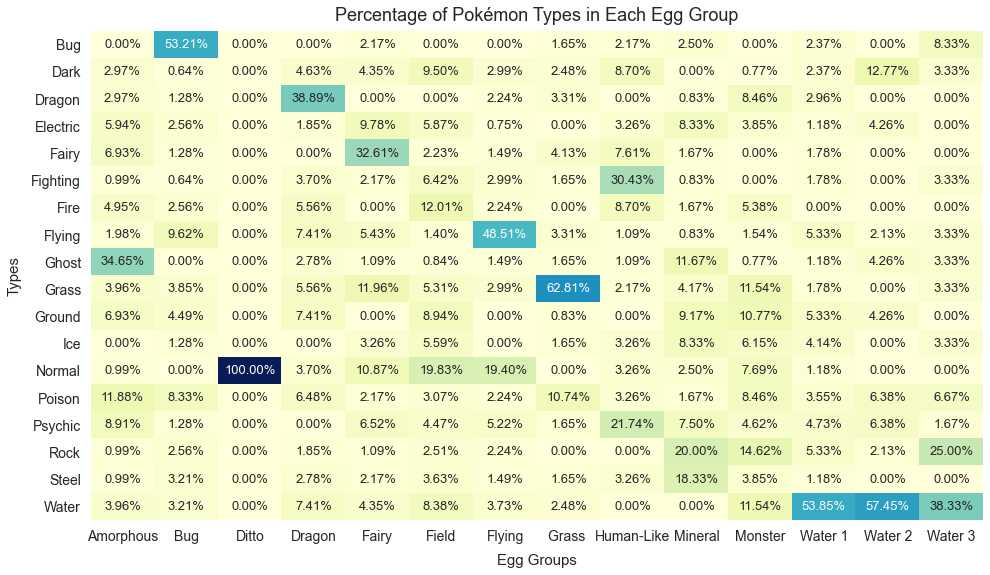

In [36]:
plt.figure(figsize=(16,9))
fontsize = 18

hm = sns.heatmap(type_egg_pivot, 
                 cmap="YlGnBu", 
                 annot=True, 
                 annot_kws={"size": fontsize-5}, 
                 fmt=".2%", 
                 cbar=False)

hm.set_xticklabels(labels=['Amorphous', 'Bug', 'Ditto', 'Dragon', 'Fairy', 'Field', 'Flying', 'Grass ', 'Human-Like', 'Mineral',
                           'Monster', 'Water 1', 'Water 2', 'Water 3'],
                   fontsize=fontsize-4, 
                   rotation=0)
hm.set_yticklabels(labels=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                           'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'], 
                   fontsize=fontsize-4)

hm.figure.axes[-1].set_xlabel('Egg Groups', size=fontsize-3, labelpad=10)
hm.figure.axes[-1].set_ylabel('Types', size=fontsize-3, labelpad=10)

plt.title('Percentage of Pokémon Types in Each Egg Group', fontsize=fontsize, pad=10);

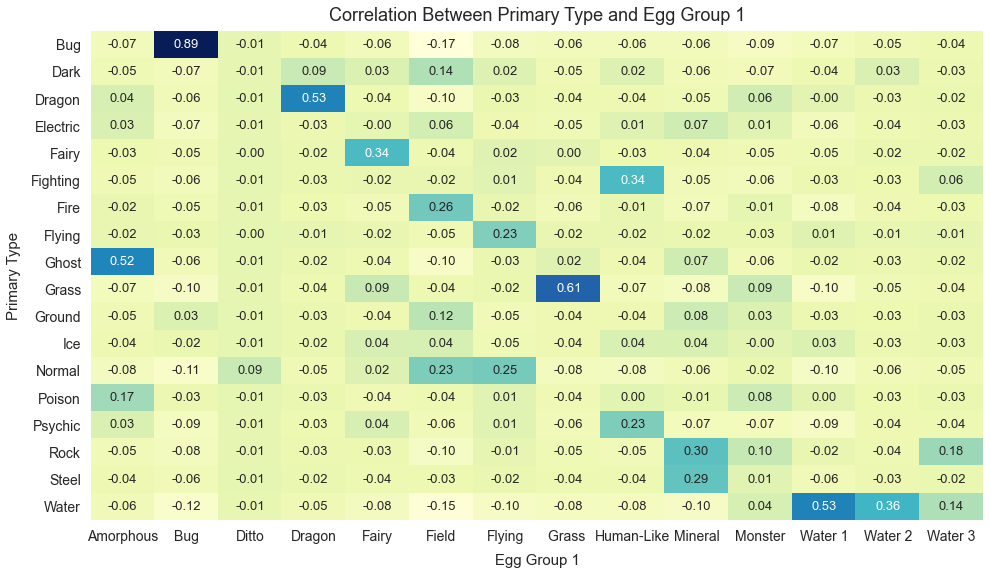

In [37]:
primary_egg1 = pokedex[['primary_type', 'egg_group_1']]
one_hot_primary_egg1 = pd.get_dummies(primary_egg1, 
                                      columns=['primary_type', 'egg_group_1'], 
                                      prefix=['primary', 'egg1'])
corr_primary_egg1 = one_hot_primary_egg1.corr()

plt.figure(figsize=(16,9))
fontsize = 18

hm = sns.heatmap(corr_primary_egg1.iloc[:18,18:], 
                 cmap="YlGnBu", 
                 annot=True, 
                 annot_kws={"size": fontsize-5}, 
                 fmt=".2f", 
                 cbar=False)

hm.set_xticklabels(labels=['Amorphous', 'Bug', 'Ditto', 'Dragon', 'Fairy', 'Field', 'Flying', 'Grass ', 'Human-Like', 'Mineral',
                           'Monster', 'Water 1', 'Water 2', 'Water 3'],
                   fontsize=fontsize-4, 
                   rotation=0)
hm.set_yticklabels(labels=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                           'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'], 
                   fontsize=fontsize-4)

hm.figure.axes[-1].set_xlabel('Egg Group 1', size=fontsize-3, labelpad=10)
hm.figure.axes[-1].set_ylabel('Primary Type', size=fontsize-3, labelpad=10)

plt.title('Correlation Between Primary Type and Egg Group 1', fontsize=fontsize, pad=10);

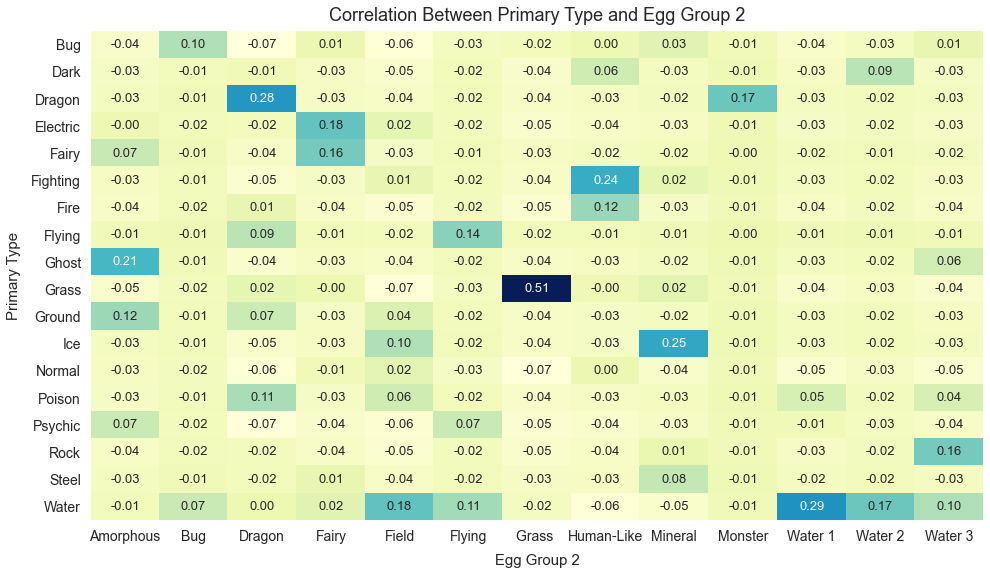

In [38]:
primary_egg2 = pokedex[['primary_type', 'egg_group_2']]
one_hot_primary_egg2 = pd.get_dummies(primary_egg2, 
                                      columns=['primary_type', 'egg_group_2'], 
                                      prefix=['primary', 'egg2'])
corr_primary_egg2 = one_hot_primary_egg2.corr()

plt.figure(figsize=(16,9))
fontsize = 18

hm = sns.heatmap(corr_primary_egg2.iloc[:18,18:], 
                 cmap="YlGnBu", 
                 annot=True, 
                 annot_kws={"size": fontsize-5}, 
                 fmt=".2f", 
                 cbar=False)

hm.set_xticklabels(labels=['Amorphous', 'Bug', 'Dragon', 'Fairy', 'Field', 'Flying', 'Grass ', 'Human-Like', 'Mineral',
                           'Monster', 'Water 1', 'Water 2', 'Water 3'],
                   fontsize=fontsize-4, 
                   rotation=0)
hm.set_yticklabels(labels=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                           'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'], 
                   fontsize=fontsize-4)

hm.figure.axes[-1].set_xlabel('Egg Group 2', size=fontsize-3, labelpad=10)
hm.figure.axes[-1].set_ylabel('Primary Type', size=fontsize-3, labelpad=10)

plt.title('Correlation Between Primary Type and Egg Group 2', fontsize=fontsize, pad=10);

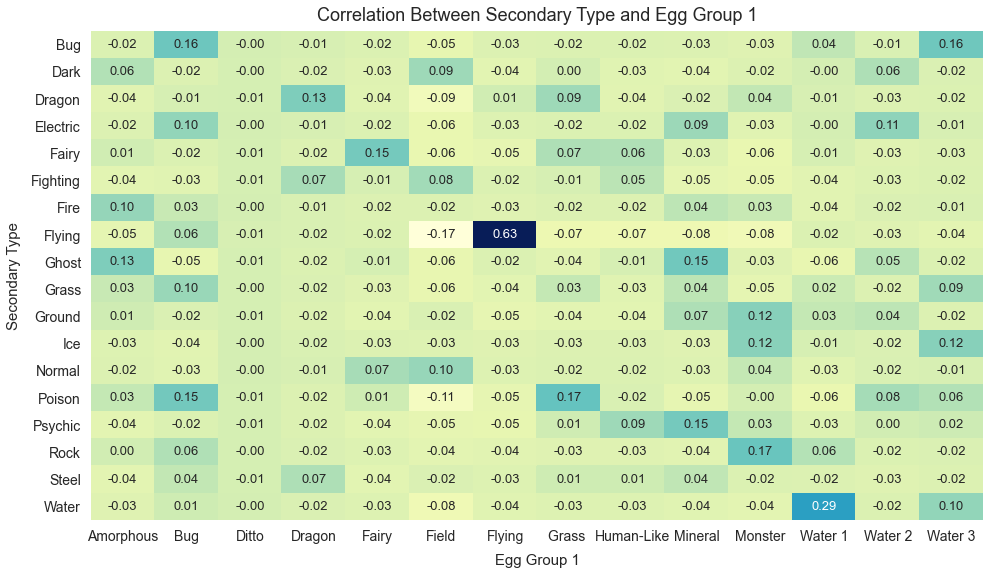

In [39]:
secondary_egg1 = pokedex[['secondary_type', 'egg_group_1']]
one_hot_secondary_egg1 = pd.get_dummies(secondary_egg1, 
                                        columns=['secondary_type', 'egg_group_1'], 
                                        prefix=['secondary', 'egg1'])
corr_secondary_egg1 = one_hot_secondary_egg1.corr()

plt.figure(figsize=(16,9))
fontsize = 18

hm = sns.heatmap(corr_secondary_egg1.iloc[:18,18:], 
                 cmap="YlGnBu", 
                 annot=True, 
                 annot_kws={"size": fontsize-5}, 
                 fmt=".2f", 
                 cbar=False)

hm.set_xticklabels(labels=['Amorphous', 'Bug', 'Ditto', 'Dragon', 'Fairy', 'Field', 'Flying', 'Grass ', 'Human-Like', 'Mineral',
                           'Monster', 'Water 1', 'Water 2', 'Water 3'],
                   fontsize=fontsize-4, 
                   rotation=0)
hm.set_yticklabels(labels=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                           'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'], 
                   fontsize=fontsize-4)

hm.figure.axes[-1].set_xlabel('Egg Group 1', size=fontsize-3, labelpad=10)
hm.figure.axes[-1].set_ylabel('Secondary Type', size=fontsize-3, labelpad=10)

plt.title('Correlation Between Secondary Type and Egg Group 1', fontsize=fontsize, pad=10);

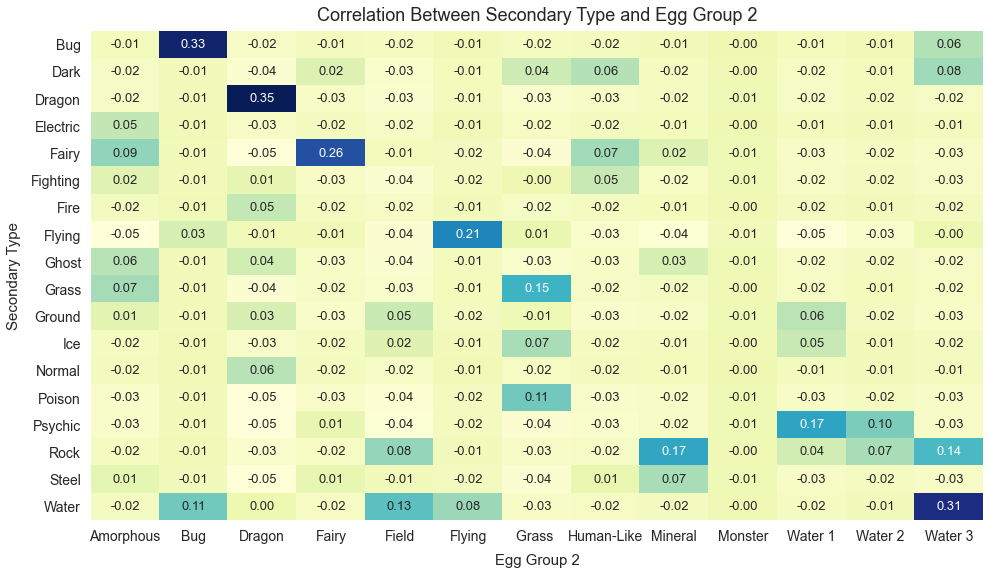

In [40]:
secondary_egg2 = pokedex[['secondary_type', 'egg_group_2']]
one_hot_secondary_egg2 = pd.get_dummies(secondary_egg2, 
                                        columns=['secondary_type', 'egg_group_2'], 
                                        prefix=['secondary', 'egg2'])
corr_secondary_egg2 = one_hot_secondary_egg2.corr()

plt.figure(figsize=(16,9))
fontsize = 18

hm = sns.heatmap(corr_secondary_egg2.iloc[:18,18:], 
                 cmap="YlGnBu", 
                 annot=True, 
                 annot_kws={"size": fontsize-5}, 
                 fmt=".2f", 
                 cbar=False)

hm.set_xticklabels(labels=['Amorphous', 'Bug', 'Dragon', 'Fairy', 'Field', 'Flying', 'Grass ', 'Human-Like', 'Mineral',
                           'Monster', 'Water 1', 'Water 2', 'Water 3'],
                   fontsize=fontsize-4, 
                   rotation=0)
hm.set_yticklabels(labels=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                           'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'], 
                   fontsize=fontsize-4)

hm.figure.axes[-1].set_xlabel('Egg Group 2', size=fontsize-3, labelpad=10)
hm.figure.axes[-1].set_ylabel('Secondary Type', size=fontsize-3, labelpad=10)

plt.title('Correlation Between Secondary Type and Egg Group 2', fontsize=fontsize, pad=10);

### Correlation Between Egg Groups and Types
#### Conclusion:
- Not all Pokemon types have a significant correlation with the egg groups. Bug, Dragon, Fairy, Fighting, Flying, Ghost, Grass, Rock, Steel, and Water types have a weak to moderate correlation with specific egg groups. Using egg groups should help correctly predict these ten types.

## 7. Is there a correlation between the types of moves Pokemon learn when they level up and their primary and secondary types?

In [41]:
# Melt types with normalized moves
proportion_columns = list(pokedex.iloc[:, 17:35])
proportion_columns.append('primary_type')
proportion_columns.append('secondary_type')
types_moves = pokedex[proportion_columns]
types_moves = types_moves.melt(id_vars=proportion_columns[:-2],
                               value_vars=['primary_type', 'secondary_type'])
types_moves = types_moves.drop(columns=['variable']).rename(columns={'value': 'type'})

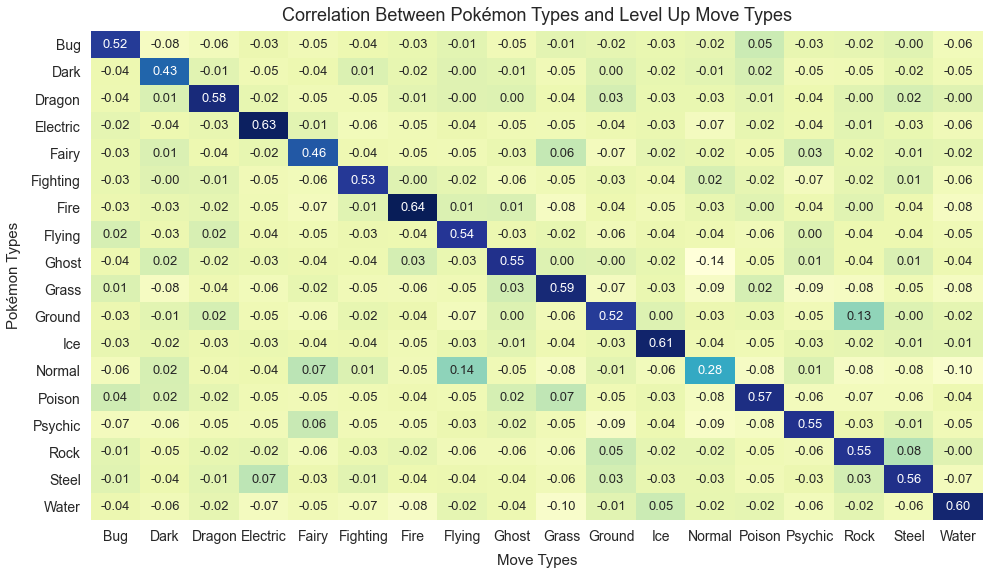

In [42]:
one_hot_types_moves = pd.get_dummies(types_moves, 
                                     columns=['type'], 
                                     prefix=['type'])
one_hot_types_moves = one_hot_types_moves.reindex(sorted(list(one_hot_types_moves.columns)), axis=1)
corr_types_moves = one_hot_types_moves.corr()

plt.figure(figsize=(16,9))
fontsize = 18

hm = sns.heatmap(corr_types_moves.iloc[18:, :18], 
                 cmap="YlGnBu", 
                 annot=True, 
                 annot_kws={"size": fontsize-5}, 
                 fmt=".2f", 
                 cbar=False)

hm.set_xticklabels(labels=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                           'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'],
                   fontsize=fontsize-4, rotation = 0)
hm.set_yticklabels(labels=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                           'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'], 
                   fontsize=fontsize-4)

hm.figure.axes[-1].set_xlabel('Move Types', size=fontsize-3, labelpad=10)
hm.figure.axes[-1].set_ylabel('Pokémon Types', size=fontsize-3, labelpad=10)

plt.title('Correlation Between Pokémon Types and Level Up Move Types', fontsize=fontsize, pad=10);

### Correlation Between the Types of Moves Pokemon Learn via Level Up and their Types
#### Conclusion:
- The proportion of move types to Pokemon types are pretty well correlated. Most of the move proportions had a moderate correlation to Pokemon of the same typing. The only exception is with Normal type moves which showed a weak correlation. This is due to the fact that just about every Pokemon can learn a random number of normal type moves. It's the common move type across all Pokemon.
- I beleive the moderate correlations between move type proportions and Pokemon's types will result in successful predictions in the modeling.

## 8. Is there power creep from earlier generations to later generations?

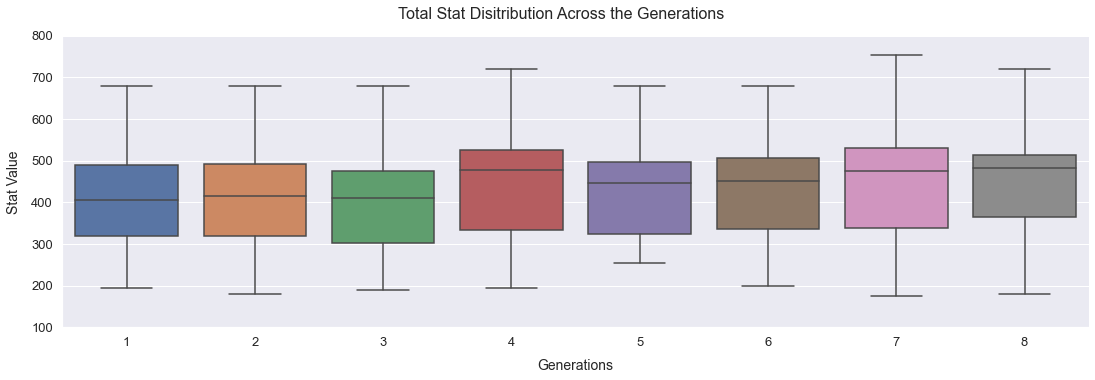

In [43]:
generation_facet = pokedex[['generation', 'total']].melt(id_vars='generation')

cp = sns.catplot(data=generation_facet, 
                 x='generation', 
                 y='value',
                 kind='box', 
                 height=5, 
                 aspect=3, 
                 sharex=False)

fontsize = 16
cp.set_xticklabels(fontsize=fontsize-3)
cp.set_yticklabels(fontsize=fontsize-3)
cp.set_xlabels('Generations', labelpad=10, fontsize=fontsize-2)
cp.set_ylabels('Stat Value', labelpad=10, fontsize=fontsize-2)
cp.fig.suptitle('Total Stat Disitribution Across the Generations', fontsize=fontsize)
cp.fig.subplots_adjust(top=.9);

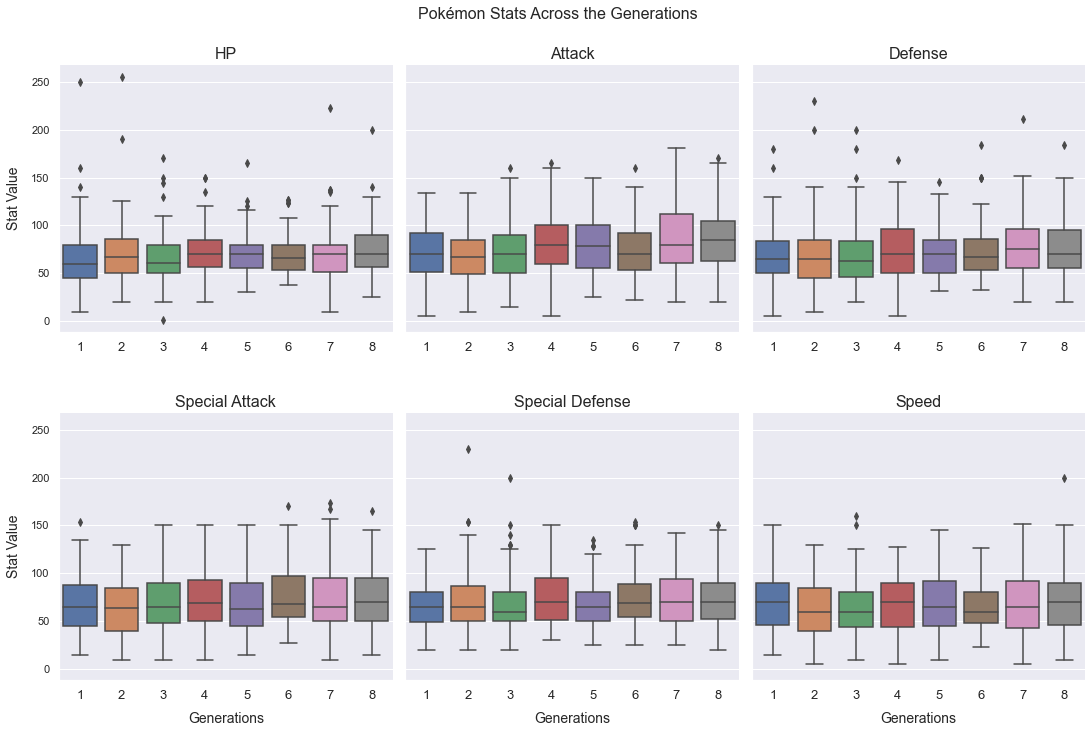

In [44]:
generation_facet = pokedex[['generation', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].melt(id_vars='generation')

cp = sns.catplot(data=generation_facet, 
                 x='generation', 
                 y='value',
                 col='variable', 
                 kind='box', 
                 col_wrap=3, 
                 sharex=False)

fontsize = 16
cp.set_xticklabels(fontsize=fontsize-3)
cp.set_xlabels('Generations', labelpad=10, fontsize=fontsize-2)
cp.set_ylabels('Stat Value', labelpad=10, fontsize=fontsize-2)
cp.fig.suptitle('Pokémon Stats Across the Generations', fontsize=fontsize)
cp.fig.subplots_adjust(top=.9)
axes = cp.axes.flatten()
axes[0].set_title("HP", fontsize=fontsize)
axes[1].set_title("Attack", fontsize=fontsize)
axes[2].set_title("Defense", fontsize=fontsize)
axes[3].set_title("Special Attack", fontsize=fontsize)
axes[4].set_title("Special Defense", fontsize=fontsize)
axes[5].set_title("Speed", fontsize=fontsize)
plt.subplots_adjust(hspace=0.3);

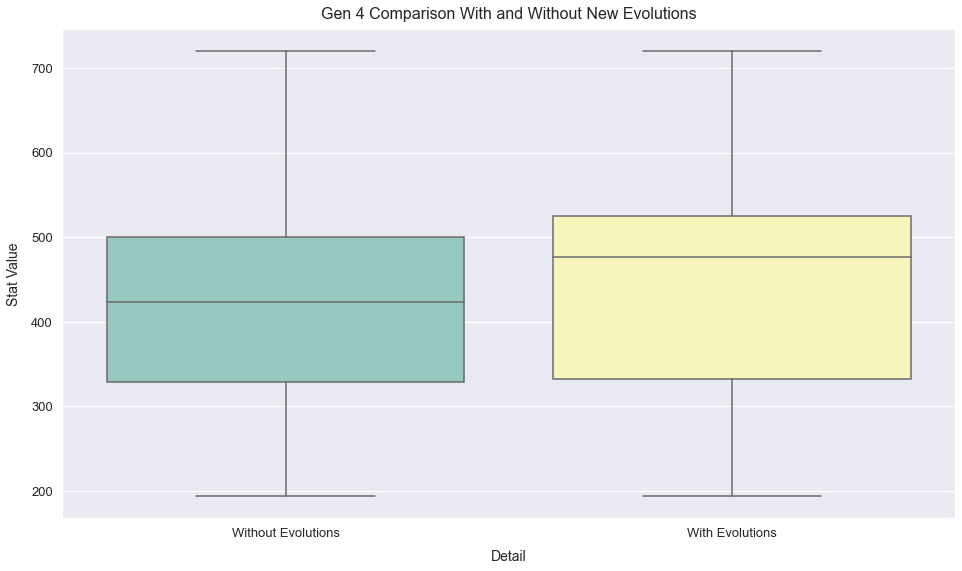

In [45]:
gen_4_with_evolutions = pokedex[pokedex['generation'] == 4]
gen_4_without_evolutions = gen_4_with_evolutions[(pokedex['pokedex_number'] < 461) | (pokedex['pokedex_number'] > 478)]
gen_4_without_evolutions['detail'] = 'Without Evolutions'
gen_4_with_evolutions['detail'] = 'With Evolutions'
gen_4 = pd.concat([gen_4_without_evolutions, gen_4_with_evolutions])

plt.figure(figsize=(16,9))
sns.boxplot(x="detail", 
            y="total", 
            data=gen_4, palette="Set3")
fontsize = 16
plt.xlabel('Detail', fontsize=fontsize-2, labelpad=10)
plt.ylabel('Stat Value', fontsize=fontsize-2, labelpad=10)
plt.xticks(fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-3)
plt.title('Gen 4 Comparison With and Without New Evolutions', fontsize=fontsize, pad=10)
plt.show()

### Power Creep Across the Eight Generations
#### Conclusion:
- Upon initial review of the above plots it would seem that generation 4 has higher stats compared to the other generations. In generation 4, they tried to make some older Pokémon viable by introducing new evolutions for them; evolutions such as Electivire, Weavile, Magnezone, etc. Taking a look at the stat distributions without these 18 new evolutions drops the median for generation 4 to around the same as the other generations. When they introduce new Pokémon in a generation it's usually with their whole evolution line and the pre-evolutions have lower stats causing the distributions to be lower. But because these were evolutions of previous Pokémon the pre-evolutions of them weren't counted in the generation 4 distribution.
- I don't think the generational variety in stat distrubiton should negatively affect either model. I will move forward using all Pokemon in the training and testing of the models.

## 9. Are there frequent pairings between primary and secondary types throughout the dataset?

In [46]:
# Count number of types in each egg group and pivot
types = pokedex[['primary_type', 'secondary_type', 'hp']]
type_count = pd.DataFrame(types.groupby(['primary_type', 'secondary_type'])['hp'].count()).reset_index()
type_pivot = type_count.pivot(index='primary_type', columns='secondary_type', values='hp').fillna(0)
type_pivot = type_pivot.astype('int64')

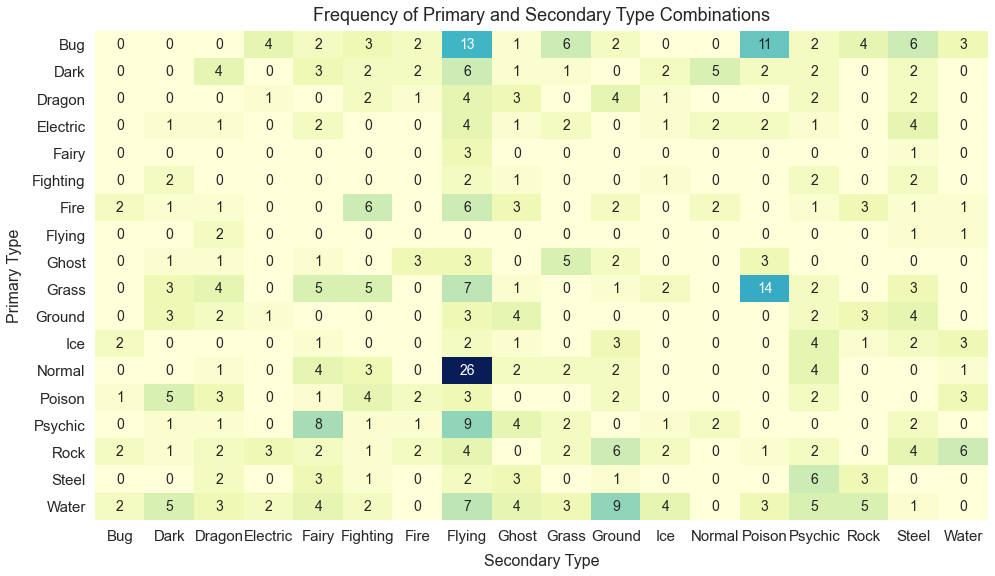

In [47]:
plt.figure(figsize=(16,9))
fontsize = 18

hm = sns.heatmap(type_pivot, 
                 cmap="YlGnBu", 
                 annot=True, 
                 annot_kws={"size": fontsize-4}, 
                 fmt="d", 
                 cbar=False)

hm.set_xticklabels(labels=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                           'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'],
                   fontsize=fontsize-3)
hm.set_yticklabels(labels=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                           'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'], 
                   fontsize=fontsize-3)

hm.figure.axes[-1].set_xlabel('Secondary Type', size=fontsize-2, labelpad=10)
hm.figure.axes[-1].set_ylabel('Primary Type', size=fontsize-2, labelpad=10)

plt.title('Frequency of Primary and Secondary Type Combinations', fontsize=fontsize, pad=10);

### Frequent Pairings Between Primary and Secondary Types
#### Conclusion:
- There is not enough correlation between primary and secondary pairings to confidently use that feature/relationship as a predictor variable to predict a Pokemon's primary or secondary typing.